           Ping Time         x         y
Ping Time   1.000000 -0.045062  0.156965
x          -0.045062  1.000000  0.321170
y           0.156965  0.321170  1.000000


C:\Users\ALI\AppData\Local\Temp\ipykernel_18764\2222905155.py:51: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final_df[['Rounded Time','Ping Time', 'x', 'y']].corr()


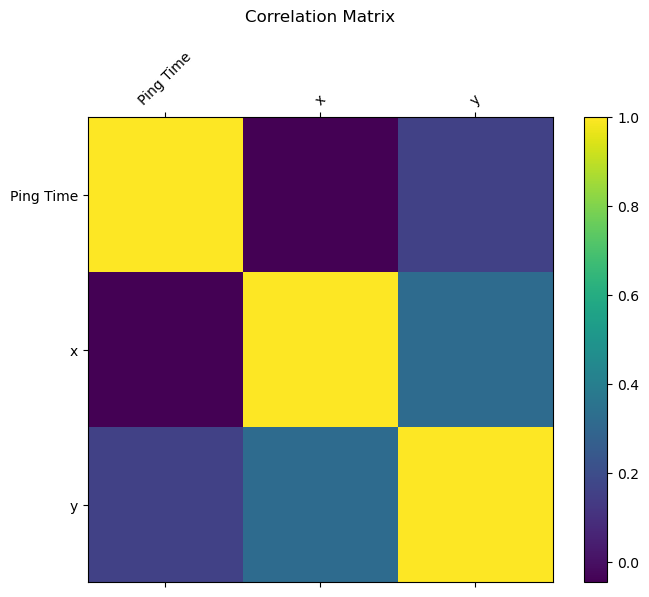

Rounded Time  Ping Time   x   y
0   2024-06-11 21:18:27+00:00  35.604286  71  56
1   2024-06-11 21:18:28+00:00  38.072464  70  56
2   2024-06-11 21:18:29+00:00  36.314706  70  57
3   2024-06-11 21:18:30+00:00  39.945588  70  56
4   2024-06-11 21:18:31+00:00  37.037681  70  58
..                        ...        ...  ..  ..
534 2024-06-11 21:27:59+00:00  54.972727  54  55
535 2024-06-11 21:28:00+00:00  31.473333  54  53
536 2024-06-11 21:28:01+00:00  31.322857  55  56
537 2024-06-11 21:28:02+00:00  27.216438  55  57
538 2024-06-11 21:28:03+00:00  29.779412  54  53

[539 rows x 4 columns]

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Step 1: Load the ping data
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Filter the DataFrame to include only the first 10 minutes
start_time = average_ping_per_second['Rounded Time'].min()
end_time = start_time + pd.Timedelta(minutes=10)
filtered_df = average_ping_per_second[(average_ping_per_second['Rounded Time'] >= start_time) & (average_ping_per_second['Rounded Time'] <= end_time)]

# Step 2: Load the coordinates data
coordinates_file_path = 'white_pixel_coordinates_xor.csv'
coordinates_df = pd.read_csv(coordinates_file_path, names=['Timestamp', 'x', 'y'])

# Convert the timestamps in coordinates_df to UTC and round to the nearest second
coordinates_df['UTC Time'] = pd.to_datetime(coordinates_df['Timestamp'], format='%Y-%m-%d %H:%M:%S', utc=True)
coordinates_df['Rounded Time'] = coordinates_df['UTC Time'].dt.round('S')

# Merge the coordinates data with the filtered average ping data
merged_df = pd.merge(filtered_df, coordinates_df, on='Rounded Time', how='inner')

# Step 3: Create the new DataFrame
final_df = merged_df[['Rounded Time', 'Ping Time', 'x', 'y']]

# Step 4: Perform correlation analysis
correlation_matrix = final_df[['Rounded Time','Ping Time', 'x', 'y']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Optional: Visualize the correlation matrix
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, fignum=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix', pad=20)
plt.show()

# Optional: Display the merged DataFrame
# import ace_tools as tools; tools.display_dataframe_to_user(name="Merged DataFrame with Average Ping and Coordinates", dataframe=final_df)
final_df

In [3]:
import pandas as pd

# Load the coordinates data to inspect column names
coordinates_file_path = 'white_pixel_coordinates_xor.csv'
coordinates_df = pd.read_csv(coordinates_file_path)

# Display the first few rows and column names
print(coordinates_df.head())
print(coordinates_df.columns)

   2024-06-11 21:18:27  71  56
0  2024-06-11 21:18:28  70  56
1  2024-06-11 21:18:29  70  57
2  2024-06-11 21:18:30  70  56
3  2024-06-11 21:18:31  70  58
4  2024-06-11 21:18:32  70  56
Index(['2024-06-11 21:18:27', '71', '56'], dtype='object')


Correlation Matrix:
           Ping Time         x         y
Ping Time   1.000000  0.162105  0.070445
x           0.162105  1.000000  0.337591
y           0.070445  0.337591  1.000000


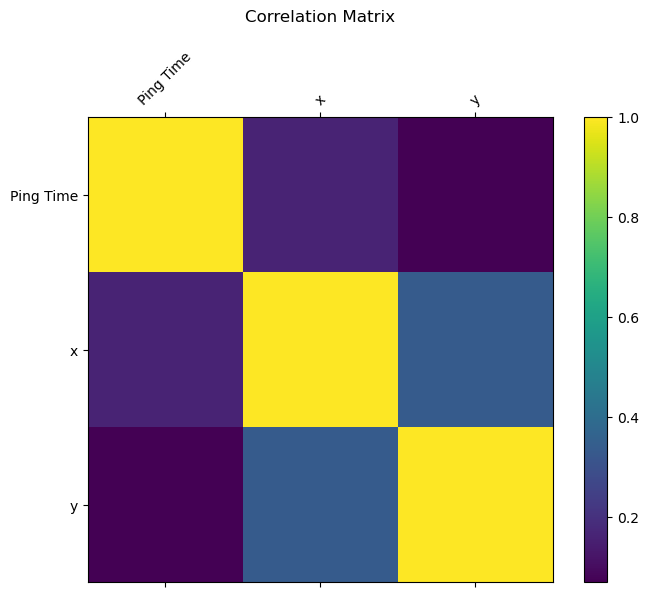

Merged DataFrame with Average Ping and Coordinates:
                  Rounded Time  Ping Time   x   y
0    2024-06-11 21:18:27+00:00  35.604286  71  56
1    2024-06-11 21:18:28+00:00  38.072464  70  56
2    2024-06-11 21:18:29+00:00  36.314706  70  57
3    2024-06-11 21:18:30+00:00  39.945588  70  56
4    2024-06-11 21:18:31+00:00  37.037681  70  58
...                        ...        ...  ..  ..
1395 2024-06-11 21:43:21+00:00  25.278788  55  69
1396 2024-06-11 21:43:22+00:00  24.917143  57  74
1397 2024-06-11 21:43:23+00:00  26.725000  55  69
1398 2024-06-11 21:43:24+00:00  23.695385  57  75
1399 2024-06-11 21:43:25+00:00  26.650725  58  75

[1400 rows x 4 columns]


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Step 1: Load the ping data
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Step 2: Load the coordinates data
coordinates_file_path = 'white_pixel_coordinates_xor.csv'
coordinates_df = pd.read_csv(coordinates_file_path, names=['Timestamp', 'x', 'y'])

# Convert the timestamps in coordinates_df to UTC and round to the nearest second
coordinates_df['UTC Time'] = pd.to_datetime(coordinates_df['Timestamp'], format='%Y-%m-%d %H:%M:%S', utc=True)
coordinates_df['Rounded Time'] = coordinates_df['UTC Time'].dt.round('S')

# Merge the coordinates data with the filtered average ping data
merged_df = pd.merge(average_ping_per_second, coordinates_df, on='Rounded Time', how='inner')

# Step 3: Create the new DataFrame
final_df = merged_df[['Rounded Time', 'Ping Time', 'x', 'y']]

# Step 4: Perform correlation analysis
correlation_matrix = final_df[['Ping Time', 'x', 'y']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Visualize the correlation matrix
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, fignum=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix', pad=20)
plt.show()

# Display the merged DataFrame
print("Merged DataFrame with Average Ping and Coordinates:")
print(final_df)


Linear Regression:
Mean Squared Error: 44.084902173872806
R^2 Score: 0.04083611473019888
------------------------------
Decision Tree:
Mean Squared Error: 27.218371169670732
R^2 Score: 0.4078045463535286
------------------------------
Random Forest:
Mean Squared Error: 22.335441977429994
R^2 Score: 0.5140433969481133
------------------------------
         Actual  Predicted
665   33.210959  32.861353
624   33.979167  31.612615
115   40.063768  30.247911
478   31.036923  32.609851
233   37.344776  32.488729
...         ...        ...
188   32.289706  31.933113
1091  25.179710  25.930308
377   32.829167  34.465895
351   25.266154  27.728570
415   24.145455  22.898029

[280 rows x 2 columns]


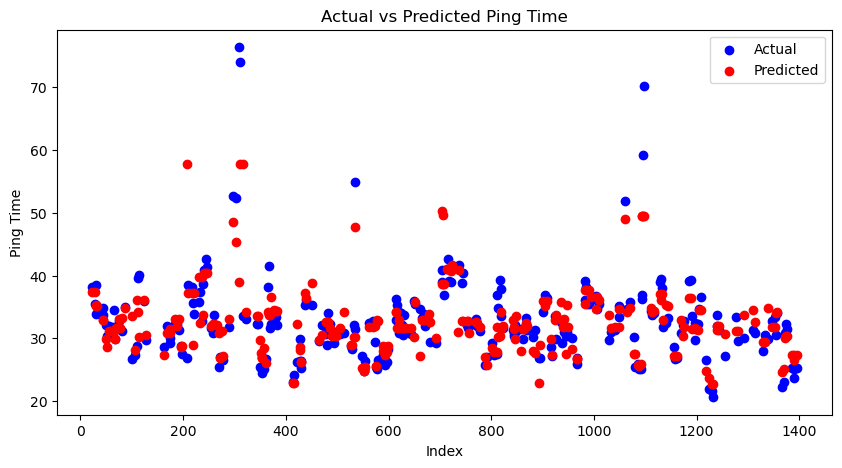

In [9]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the ping data
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Step 2: Load the coordinates data
coordinates_file_path = 'white_pixel_coordinates_xor.csv'
coordinates_df = pd.read_csv(coordinates_file_path, names=['Timestamp', 'x', 'y'])

# Convert the timestamps in coordinates_df to UTC and round to the nearest second
coordinates_df['UTC Time'] = pd.to_datetime(coordinates_df['Timestamp'], format='%Y-%m-%d %H:%M:%S', utc=True)
coordinates_df['Rounded Time'] = coordinates_df['UTC Time'].dt.round('S')

# Merge the coordinates data with the filtered average ping data
merged_df = pd.merge(average_ping_per_second, coordinates_df, on='Rounded Time', how='inner')

# Step 3: Create the new DataFrame
final_df = merged_df[['Rounded Time', 'Ping Time', 'x', 'y']]

# Step 4: Prepare the data for machine learning
X = final_df[['x', 'y']]
y = final_df['Ping Time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print('-'*30)

# Choose the best model (Random Forest in this example) and predict
best_model = models['Random Forest']
y_pred = best_model.predict(X_test)

# Display the predictions vs actual values
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df)

# Optional: Visualize the predictions
plt.figure(figsize=(10, 5))
plt.scatter(predictions_df.index, predictions_df['Actual'], color='blue', label='Actual')
plt.scatter(predictions_df.index, predictions_df['Predicted'], color='red', label='Predicted')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time')
plt.show()


Linear Regression:
Training Mean Squared Error: 36.099065988917935
Training R^2 Score: 0.021430037746790087
Testing Mean Squared Error: 44.084902173872806
Testing R^2 Score: 0.04083611473019888
------------------------------
Decision Tree:
Training Mean Squared Error: 6.740580762442996
Training R^2 Score: 0.8172769936958063
Testing Mean Squared Error: 27.221543245547245
Testing R^2 Score: 0.4077355308749394
------------------------------
Random Forest:
Training Mean Squared Error: 7.547321786286436
Training R^2 Score: 0.7954079366544705
Testing Mean Squared Error: 22.335441977429994
Testing R^2 Score: 0.5140433969481133
------------------------------


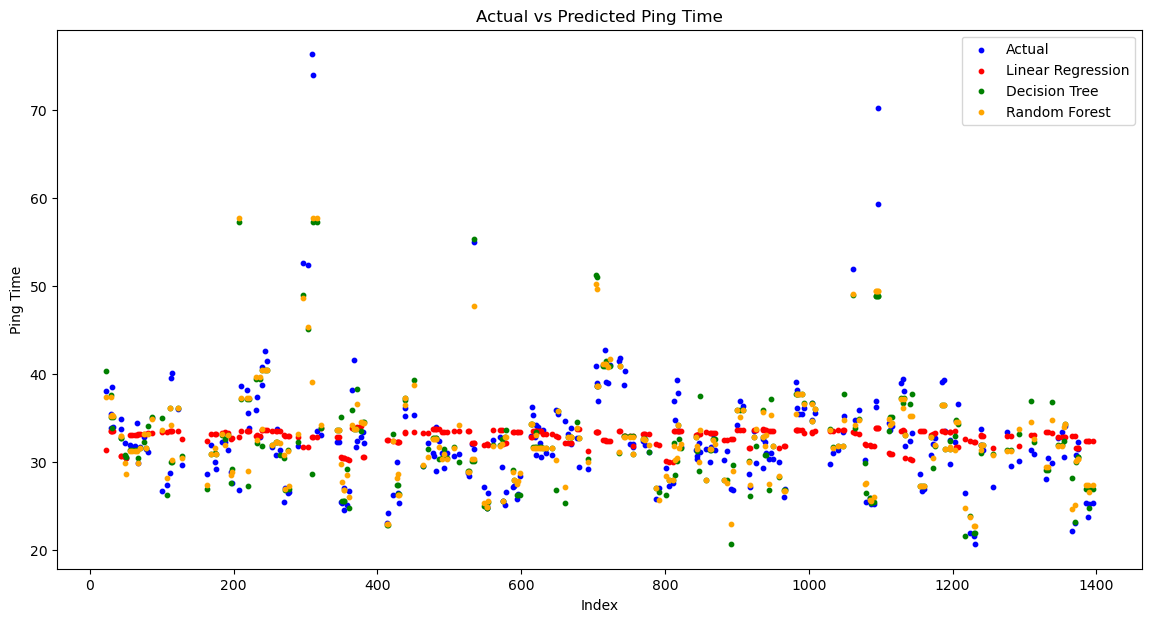

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the ping data
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Step 2: Load the coordinates data
coordinates_file_path = 'white_pixel_coordinates_xor.csv'
coordinates_df = pd.read_csv(coordinates_file_path, names=['Timestamp', 'x', 'y'])

# Convert the timestamps in coordinates_df to UTC and round to the nearest second
coordinates_df['UTC Time'] = pd.to_datetime(coordinates_df['Timestamp'], format='%Y-%m-%d %H:%M:%S', utc=True)
coordinates_df['Rounded Time'] = coordinates_df['UTC Time'].dt.round('S')

# Merge the coordinates data with the filtered average ping data
merged_df = pd.merge(average_ping_per_second, coordinates_df, on='Rounded Time', how='inner')

# Step 3: Create the new DataFrame
final_df = merged_df[['Rounded Time', 'Ping Time', 'x', 'y']]

# Step 4: Prepare the data for machine learning
X = final_df[['x', 'y']]
y = final_df['Ping Time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and predict using the models
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Store predictions for testing data
    predictions[model_name] = y_test_pred
    
    # Calculate metrics for training data
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Calculate metrics for testing data
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Print metrics
    print(f'{model_name}:')
    print(f'Training Mean Squared Error: {train_mse}')
    print(f'Training R^2 Score: {train_r2}')
    print(f'Testing Mean Squared Error: {test_mse}')
    print(f'Testing R^2 Score: {test_r2}')
    print('-'*30)

# Plot the predictions of all models
plt.figure(figsize=(14, 7))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', s=10)
colors = ['red', 'green', 'orange']
for i, (model_name, y_pred) in enumerate(predictions.items()):
    plt.scatter(y_test.index, y_pred, color=colors[i], label=model_name, s=10)

plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time')
plt.show()


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Random Forest:
Training Mean Squared Error: 9.957211441902382
Training R^2 Score: 0.7300808827618724
Testing Mean Squared Error: 21.50813393510422
Testing R^2 Score: 0.5320433007034273
------------------------------
Gradient Boosting Regressor:
Training Mean Squared Error: 17.202027365890004
Training R^2 Score: 0.5336891188463062
Testing Mean Squared Error: 25.332528942920153
Testing R^2 Score: 0.4488351865051575
------------------------------


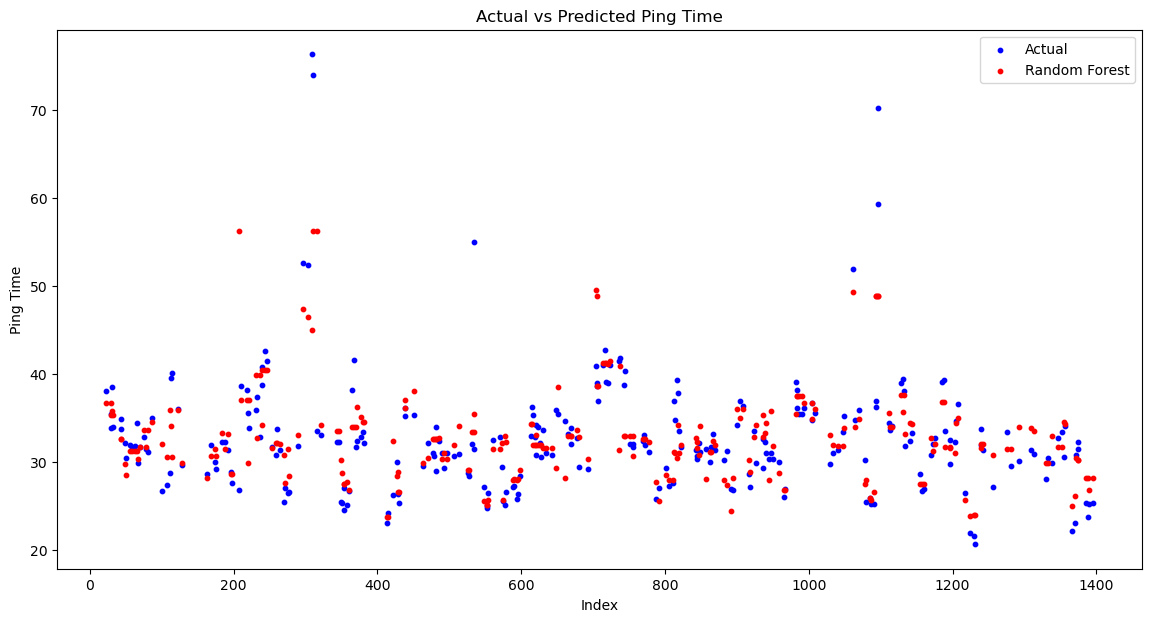

In [12]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the ping data
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Step 2: Load the coordinates data
coordinates_file_path = 'white_pixel_coordinates_xor.csv'
coordinates_df = pd.read_csv(coordinates_file_path, names=['Timestamp', 'x', 'y'])

# Convert the timestamps in coordinates_df to UTC and round to the nearest second
coordinates_df['UTC Time'] = pd.to_datetime(coordinates_df['Timestamp'], format='%Y-%m-%d %H:%M:%S', utc=True)
coordinates_df['Rounded Time'] = coordinates_df['UTC Time'].dt.round('S')

# Merge the coordinates data with the filtered average ping data
merged_df = pd.merge(average_ping_per_second, coordinates_df, on='Rounded Time', how='inner')

# Step 3: Create the new DataFrame
final_df = merged_df[['Rounded Time', 'Ping Time', 'x', 'y']]

# Step 4: Prepare the data for machine learning
X = final_df[['x', 'y']]
y = final_df['Ping Time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_

# Evaluate the best Random Forest model
y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)

train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print('Best Random Forest:')
print(f'Training Mean Squared Error: {train_mse_rf}')
print(f'Training R^2 Score: {train_r2_rf}')
print(f'Testing Mean Squared Error: {test_mse_rf}')
print(f'Testing R^2 Score: {test_r2_rf}')
print('-'*30)

# Step 6: Gradient Boosting Regressor
gbm = GradientBoostingRegressor(random_state=42)
gbm.fit(X_train, y_train)

y_train_pred_gbm = gbm.predict(X_train)
y_test_pred_gbm = gbm.predict(X_test)

train_mse_gbm = mean_squared_error(y_train, y_train_pred_gbm)
train_r2_gbm = r2_score(y_train, y_train_pred_gbm)
test_mse_gbm = mean_squared_error(y_test, y_test_pred_gbm)
test_r2_gbm = r2_score(y_test, y_test_pred_gbm)

print('Gradient Boosting Regressor:')
print(f'Training Mean Squared Error: {train_mse_gbm}')
print(f'Training R^2 Score: {train_r2_gbm}')
print(f'Testing Mean Squared Error: {test_mse_gbm}')
print(f'Testing R^2 Score: {test_r2_gbm}')
print('-'*30)

# Plot the predictions of the best models
plt.figure(figsize=(14, 7))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', s=10)
plt.scatter(y_test.index, y_test_pred_rf, color='red', label='Random Forest', s=10)
# plt.scatter(y_test.index, y_test_pred_gbm, color='green', label='Gradient Boosting', s=10)

plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time')
plt.show()


Epoch 1/20
35/35 [==============================] - 4s 9ms/step - loss: 0.0168
Epoch 2/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0098
Epoch 3/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0090
Epoch 4/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0091
Epoch 5/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 6/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 7/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 8/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 9/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 10/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 11/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 12/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0055
Epoch 13/20
35/35 [==============================

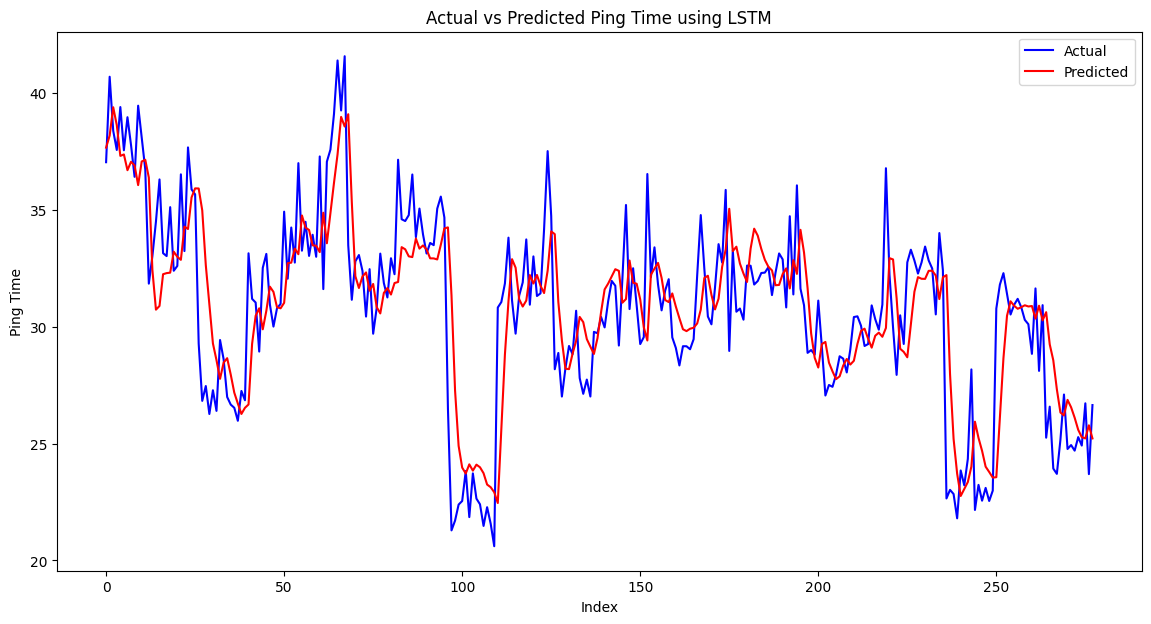

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Step 1: Load the ping data
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Step 2: Load the coordinates data
coordinates_file_path = 'white_pixel_coordinates_xor.csv'
coordinates_df = pd.read_csv(coordinates_file_path, names=['Timestamp', 'x', 'y'])

# Convert the timestamps in coordinates_df to UTC and round to the nearest second
coordinates_df['UTC Time'] = pd.to_datetime(coordinates_df['Timestamp'], format='%Y-%m-%d %H:%M:%S', utc=True)
coordinates_df['Rounded Time'] = coordinates_df['UTC Time'].dt.round('S')

# Merge the coordinates data with the filtered average ping data
merged_df = pd.merge(average_ping_per_second, coordinates_df, on='Rounded Time', how='inner')

# Step 3: Create the new DataFrame
final_df = merged_df[['Rounded Time', 'Ping Time', 'x', 'y']]

# Step 4: Prepare the data for LSTM
# Sort by Rounded Time
final_df = final_df.sort_values('Rounded Time')

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(final_df[['Ping Time', 'x', 'y']])

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 10
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Step 5: Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 3)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Step 6: Evaluate the LSTM model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred, X_train[:, -1, 1:]), axis=1))[:, 0]
y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred, X_test[:, -1, 1:]), axis=1))[:, 0]

y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('LSTM Model:')
print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'Testing R^2 Score: {test_r2}')
print('-'*30)

# Step 7: Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_test_pred, color='red', label='Predicted')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using LSTM')
plt.show()


Epoch 1/20
129/129 [==============================] - 4s 6ms/step - loss: 0.0066
Epoch 2/20
129/129 [==============================] - 1s 6ms/step - loss: 0.0039
Epoch 3/20
129/129 [==============================] - 1s 7ms/step - loss: 0.0032
Epoch 4/20
129/129 [==============================] - 1s 8ms/step - loss: 0.0029
Epoch 5/20
129/129 [==============================] - 1s 8ms/step - loss: 0.0026
Epoch 6/20
129/129 [==============================] - 1s 8ms/step - loss: 0.0024
Epoch 7/20
129/129 [==============================] - 1s 8ms/step - loss: 0.0023
Epoch 8/20
129/129 [==============================] - 1s 9ms/step - loss: 0.0022
Epoch 9/20
129/129 [==============================] - 1s 7ms/step - loss: 0.0022
Epoch 10/20
129/129 [==============================] - 1s 8ms/step - loss: 0.0022
Epoch 11/20
129/129 [==============================] - 1s 8ms/step - loss: 0.0022
Epoch 12/20
129/129 [==============================] - 1s 9ms/step - loss: 0.0022
Epoch 13/20
129/129 [====

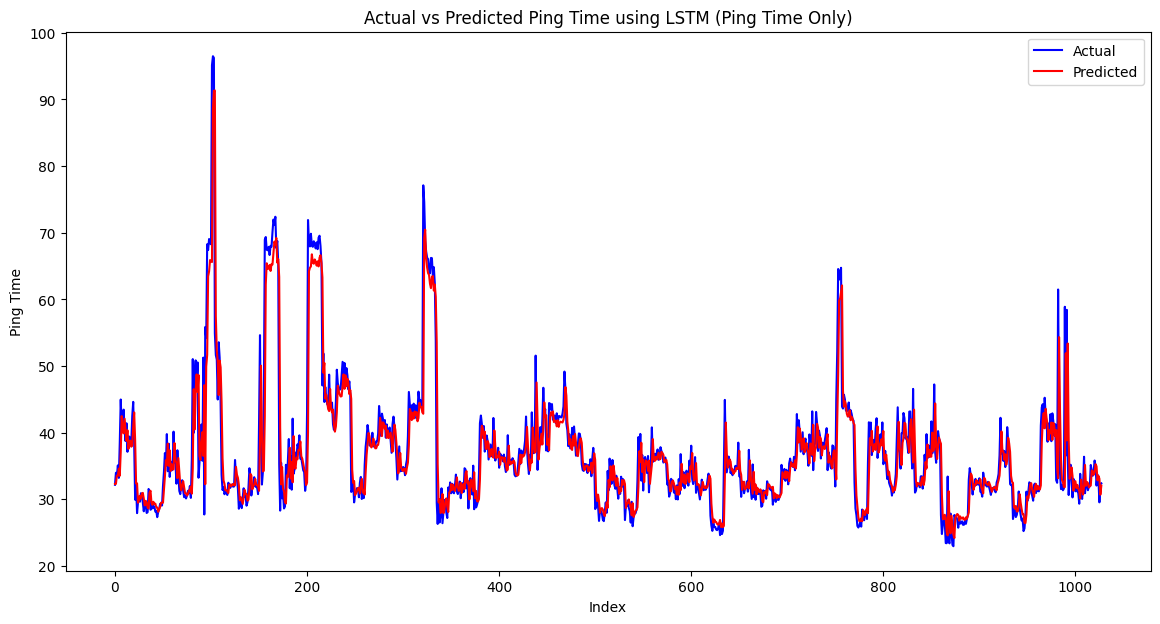

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Step 1: Load the ping data
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Step 3: Prepare the data for LSTM (using only Ping Time)
final_df = average_ping_per_second[['Rounded Time', 'Ping Time']]

# Sort by Rounded Time
final_df = final_df.sort_values('Rounded Time')

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(final_df[['Ping Time']])

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 10
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Step 4: Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Step 5: Evaluate the LSTM model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('LSTM Model (Ping Time Only):')
print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'Testing R^2 Score: {test_r2}')
print('-'*30)

# Step 6: Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_test_pred, color='red', label='Predicted')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using LSTM (Ping Time Only)')
plt.show()


Epoch 1/20
35/35 [==============================] - 3s 8ms/step - loss: 0.0211
Epoch 2/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 3/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 4/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 5/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0077
Epoch 6/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0073
Epoch 7/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0069
Epoch 8/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 9/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 10/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0056
Epoch 11/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 12/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0050
Epoch 13/20
35/35 [==============================

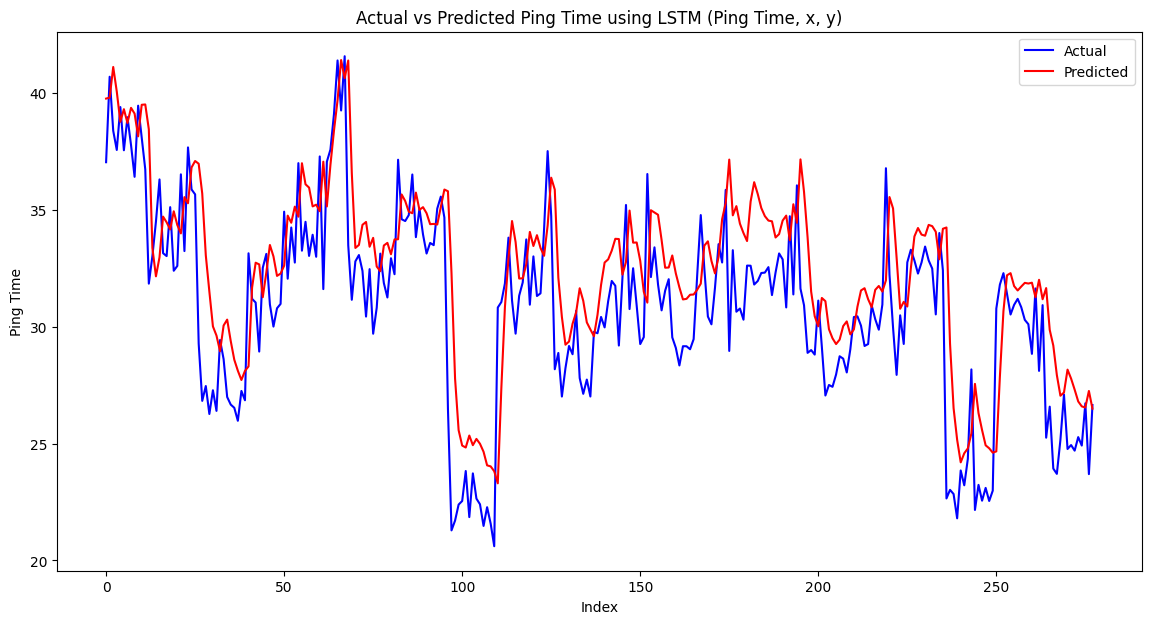

In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Step 1: Load the ping data
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Step 2: Load the coordinates data
coordinates_file_path = 'white_pixel_coordinates_xor.csv'
coordinates_df = pd.read_csv(coordinates_file_path, names=['Timestamp', 'x', 'y'])

# Convert the timestamps in coordinates_df to UTC and round to the nearest second
coordinates_df['UTC Time'] = pd.to_datetime(coordinates_df['Timestamp'], format='%Y-%m-%d %H:%M:%S', utc=True)
coordinates_df['Rounded Time'] = coordinates_df['UTC Time'].dt.round('S')

# Merge the coordinates data with the filtered average ping data
merged_df = pd.merge(average_ping_per_second, coordinates_df, on='Rounded Time', how='inner')

# Step 3: Create the new DataFrame
final_df = merged_df[['Rounded Time', 'Ping Time', 'x', 'y']]

# Step 4: Prepare the data for LSTM
# Sort by Rounded Time
final_df = final_df.sort_values('Rounded Time')

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(final_df[['Ping Time', 'x', 'y']])

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 10
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Step 5: Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 3)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Step 6: Evaluate the LSTM model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred, X_train[:, -1, 1:]), axis=1))[:, 0]
y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred, X_test[:, -1, 1:]), axis=1))[:, 0]

y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('LSTM Model (Ping Time, x, y):')
print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'Testing R^2 Score: {test_r2}')
print('-'*30)

# Step 7: Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_test_pred, color='red', label='Predicted')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using LSTM (Ping Time, x, y)')
plt.show()


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best: 0.701795 using {'batch_size': 16, 'epochs': 20, 'model__units': 150, 'optimizer': 'adam'}
Epoch 1/20
70/70 - 1s - loss: 0.0037 - 703ms/epoch - 10ms/step
Epoch 2/20
70/70 - 1s - loss: 0.0039 - 701ms/epoch - 10ms/step
Epoch 3/20
70/70 - 1s - loss: 0.0037 - 698ms/epoch - 10ms/step
Epoch 4/20
70/70 - 1s - loss: 0.0037 - 672ms/epoch - 10ms/step
Epoch 5/20
70/70 - 1s - loss: 0.0037 - 684ms/epoch - 10ms/step
Epoch 6/20
70/70 - 1s - loss: 0.0036 - 680ms/epoch - 10ms/step
Epoch 7/20
70/70 - 1s - loss: 0.0036 - 677ms/epoch - 10ms/step
Epoch 8/20
70/70 - 1s - loss: 0.0037 - 695ms/epoch - 10ms/step
Epoch 9/20
70/70 - 1s - loss: 0.0035 - 683ms/epoch - 10ms/step
Epoch 10/20
70/70 - 1s - loss: 0.0039 - 675ms/epoch - 10ms/step
Epoch 11/20
70/70 - 1s - loss: 0.0035 - 688ms/epoch - 10ms/step
Epoch 12/20
70/70 - 1s - loss: 0.0038 - 683ms/epoch - 10ms/step
Epoch 13/20
70/70 - 1s - loss: 0.0034 - 690ms/epoch - 10ms/step
Epoch 14/20
70/70 -

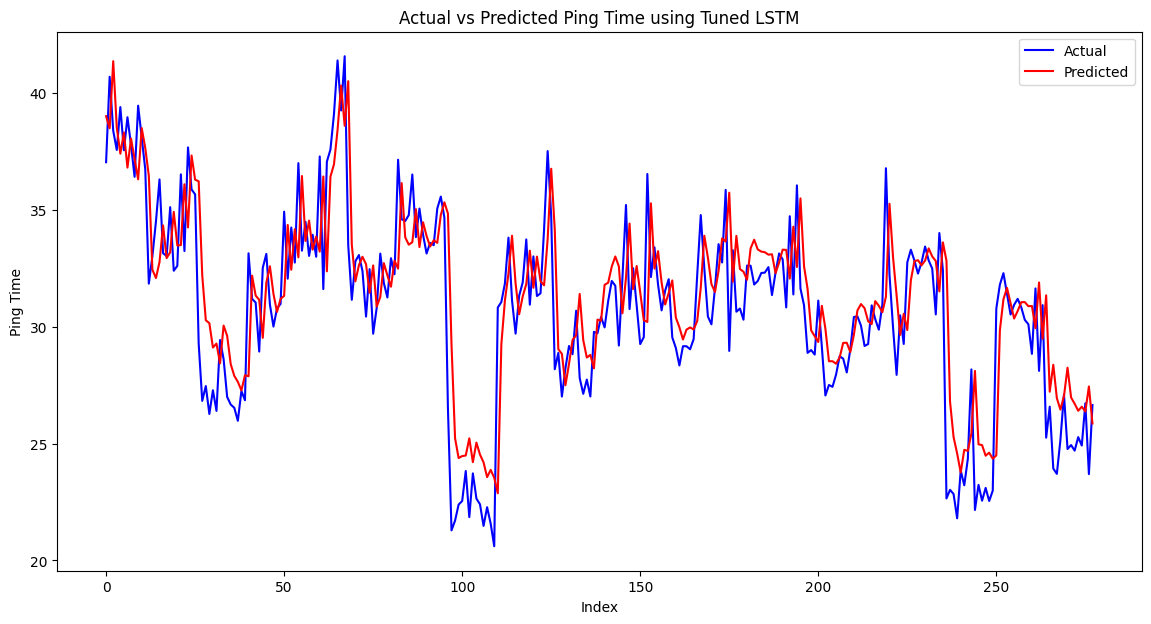

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Step 1: Load the ping data
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Step 2: Load the coordinates data
coordinates_file_path = 'white_pixel_coordinates_xor.csv'
coordinates_df = pd.read_csv(coordinates_file_path, names=['Timestamp', 'x', 'y'])

# Convert the timestamps in coordinates_df to UTC and round to the nearest second
coordinates_df['UTC Time'] = pd.to_datetime(coordinates_df['Timestamp'], format='%Y-%m-%d %H:%M:%S', utc=True)
coordinates_df['Rounded Time'] = coordinates_df['UTC Time'].dt.round('S')

# Merge the coordinates data with the filtered average ping data
merged_df = pd.merge(average_ping_per_second, coordinates_df, on='Rounded Time', how='inner')

# Step 3: Create the new DataFrame
final_df = merged_df[['Rounded Time', 'Ping Time', 'x', 'y']]

# Step 4: Prepare the data for LSTM
# Sort by Rounded Time
final_df = final_df.sort_values('Rounded Time')

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(final_df[['Ping Time', 'x', 'y']])

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 10
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Step 5: Define the model creation function
def create_model(units=50, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(SEQ_LENGTH, 3)))
    model.add(LSTM(units, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Step 6: Wrap the model using KerasRegressor from SciKeras
model = KerasRegressor(model=create_model, verbose=0)

# Step 7: Define the grid search parameters
param_grid = {
    'model__units': [50, 100, 150],
    'batch_size': [16, 32, 64],
    'epochs': [10, 20],
    'optimizer': ['adam', 'rmsprop']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_result = grid.fit(X_train, y_train)

# Step 8: Summarize the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Step 9: Train the best model
best_model = grid_result.best_estimator_.model_
best_model.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], verbose=2)

# Step 10: Evaluate the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Tuned LSTM Model:')
print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'Testing R^2 Score: {test_r2}')
print('-'*30)

# Step 11: Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_test_pred, color='red', label='Predicted')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using Tuned LSTM')
plt.show()


Epoch 1/20
17821/17821 - 167s - loss: 0.0064 - 167s/epoch - 9ms/step
Epoch 2/20
17821/17821 - 164s - loss: 0.0061 - 164s/epoch - 9ms/step
Epoch 3/20
17821/17821 - 165s - loss: 0.0060 - 165s/epoch - 9ms/step
Epoch 4/20
17821/17821 - 177s - loss: 0.0060 - 177s/epoch - 10ms/step
Epoch 5/20
17821/17821 - 164s - loss: 0.0060 - 164s/epoch - 9ms/step
Epoch 6/20
17821/17821 - 158s - loss: 0.0059 - 158s/epoch - 9ms/step
Epoch 7/20
17821/17821 - 156s - loss: 0.0059 - 156s/epoch - 9ms/step
Epoch 8/20
17821/17821 - 159s - loss: 0.0059 - 159s/epoch - 9ms/step
Epoch 9/20
17821/17821 - 159s - loss: 0.0059 - 159s/epoch - 9ms/step
Epoch 10/20
17821/17821 - 161s - loss: 0.0059 - 161s/epoch - 9ms/step
Epoch 11/20
17821/17821 - 160s - loss: 0.0059 - 160s/epoch - 9ms/step
Epoch 12/20
17821/17821 - 154s - loss: 0.0059 - 154s/epoch - 9ms/step
Epoch 13/20
17821/17821 - 160s - loss: 0.0059 - 160s/epoch - 9ms/step
Epoch 14/20
17821/17821 - 159s - loss: 0.0058 - 159s/epoch - 9ms/step
Epoch 15/20
17821/17821 - 15

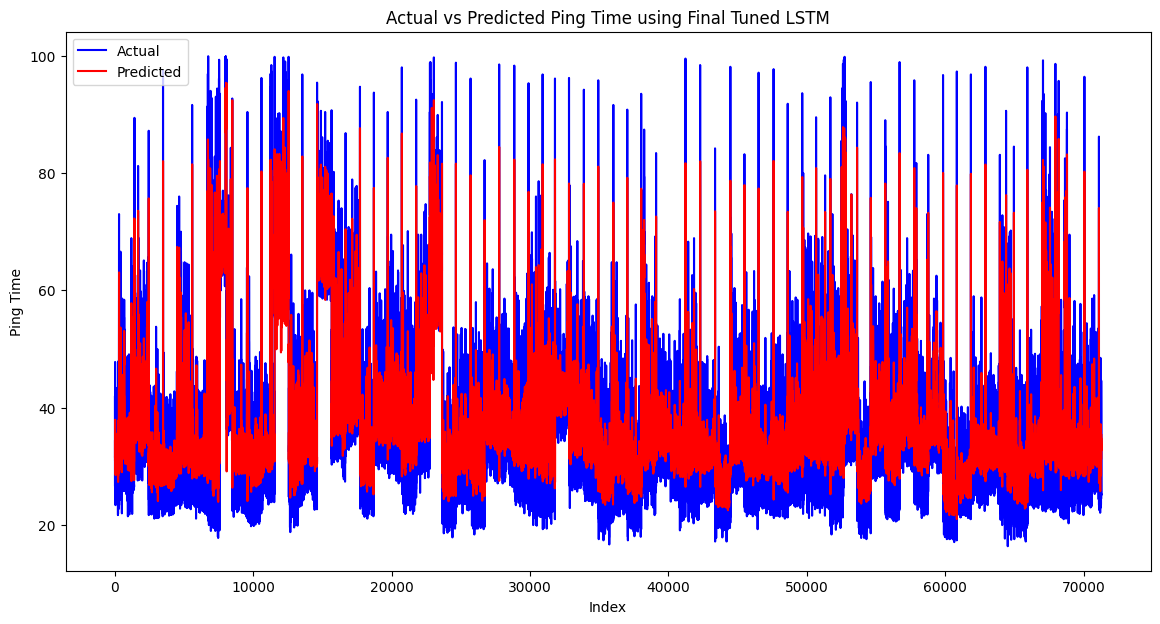

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Load the ping data
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Step 2: Prepare the data for LSTM
# Sort by UTC Time
df = df.sort_values('UTC Time')

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Ping Time']])

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 10
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Step 3: Define the model with best hyperparameters
def create_best_model():
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
    model.add(LSTM(150, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

best_model = create_best_model()

# Step 4: Train the best model
best_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=2)

# Step 5: Evaluate the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Final Tuned LSTM Model:')
print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'Testing R^2 Score: {test_r2}')
print('-'*30)

# Step 6: Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_test_pred, color='red', label='Predicted')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using Final Tuned LSTM')
plt.show()


In [6]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, Dense, Dropout, MaxPooling1D, Flatten, Reshape
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Step 1: Load the ping data
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Feature Engineering: Adding lag features and rolling statistics
df['Lag_1'] = df['Ping Time'].shift(1)
df['Lag_2'] = df['Ping Time'].shift(2)
df['Rolling_Mean'] = df['Ping Time'].rolling(window=5).mean()
df['Rolling_Std'] = df['Ping Time'].rolling(window=5).std()
df.dropna(inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Ping Time', 'Lag_1', 'Lag_2', 'Rolling_Mean', 'Rolling_Std']])

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 10
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Define the hybrid LSTM-CNN model
def create_hybrid_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(SEQ_LENGTH, 5)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(SEQ_LENGTH, activation='relu'))  # Ensures the right shape for LSTM input
    model.add(Reshape((SEQ_LENGTH, 1)))  # Reshape for LSTM input
    model.add(LSTM(150, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(150, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

hybrid_model = create_hybrid_model()

# Train the model with early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
history = hybrid_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluate the hybrid model
y_train_pred = hybrid_model.predict(X_train)
y_test_pred = hybrid_model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred, X_train[:, -1, 1:]), axis=1))[:, 0]
y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred, X_test[:, -1, 1:]), axis=1))[:, 0]

y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Hybrid LSTM-CNN Model:')
print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'Testing R^2 Score: {test_r2}')
print('-'*30)

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_train)), y_train, color='blue', label='Actual Train')
plt.plot(range(len(y_train)), y_train_pred, color='red', label='Predicted Train')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='green', label='Actual Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, color='orange', label='Predicted Test')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using Hybrid LSTM-CNN')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/50
7129/7129 - 387s - loss: 0.0079 - val_loss: 0.0080 - lr: 0.0010 - 387s/epoch - 54ms/step
Epoch 2/50
7129/7129 - 364s - loss: 0.0076 - val_loss: 0.0077 - lr: 0.0010 - 364s/epoch - 51ms/step
Epoch 3/50


KeyboardInterrupt: 

Epoch 1/20
70/70 - 4s - loss: 0.0133 - 4s/epoch - 61ms/step
Epoch 2/20
70/70 - 1s - loss: 0.0090 - 1s/epoch - 18ms/step
Epoch 3/20
70/70 - 1s - loss: 0.0078 - 1s/epoch - 17ms/step
Epoch 4/20
70/70 - 1s - loss: 0.0064 - 1s/epoch - 17ms/step
Epoch 5/20
70/70 - 1s - loss: 0.0066 - 1s/epoch - 17ms/step
Epoch 6/20
70/70 - 1s - loss: 0.0059 - 1s/epoch - 18ms/step
Epoch 7/20
70/70 - 1s - loss: 0.0059 - 1s/epoch - 18ms/step
Epoch 8/20
70/70 - 1s - loss: 0.0049 - 1s/epoch - 18ms/step
Epoch 9/20
70/70 - 1s - loss: 0.0050 - 1s/epoch - 18ms/step
Epoch 10/20
70/70 - 2s - loss: 0.0050 - 2s/epoch - 27ms/step
Epoch 11/20
70/70 - 2s - loss: 0.0047 - 2s/epoch - 30ms/step
Epoch 12/20
70/70 - 2s - loss: 0.0047 - 2s/epoch - 30ms/step
Epoch 13/20
70/70 - 2s - loss: 0.0045 - 2s/epoch - 31ms/step
Epoch 14/20
70/70 - 2s - loss: 0.0046 - 2s/epoch - 32ms/step
Epoch 15/20
70/70 - 2s - loss: 0.0043 - 2s/epoch - 33ms/step
Epoch 16/20
70/70 - 2s - loss: 0.0045 - 2s/epoch - 32ms/step
Epoch 17/20
70/70 - 2s - loss: 0.

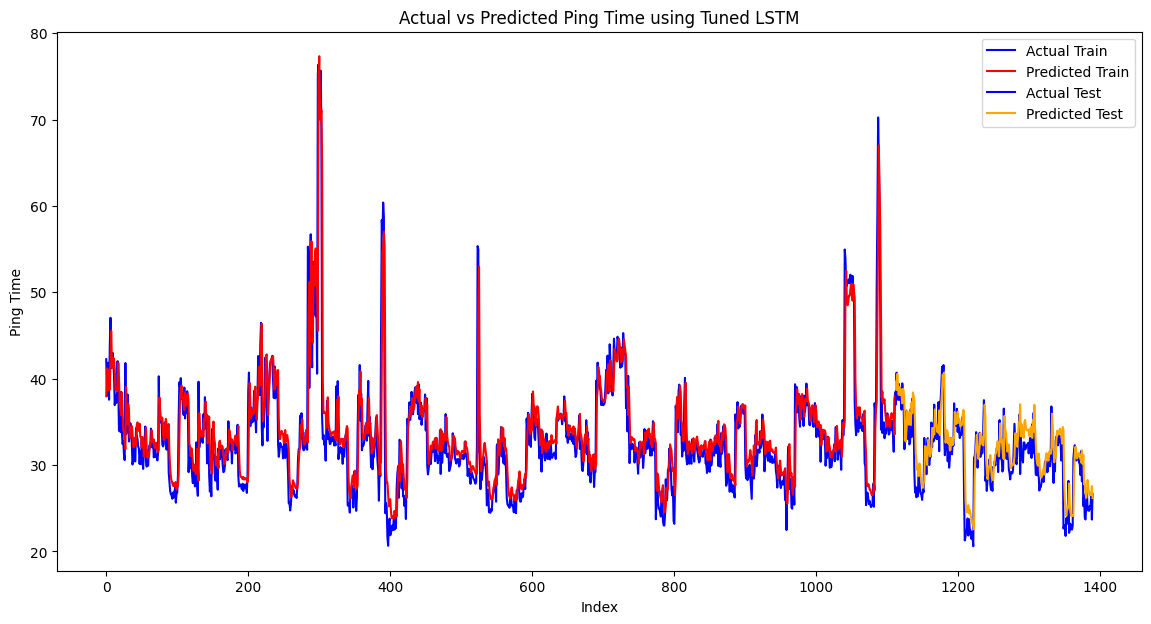

In [8]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Load the ping data
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Step 2: Load the coordinates data
coordinates_file_path = 'white_pixel_coordinates_xor.csv'
coordinates_df = pd.read_csv(coordinates_file_path, names=['Timestamp', 'x', 'y'])

# Convert the timestamps in coordinates_df to UTC and round to the nearest second
coordinates_df['UTC Time'] = pd.to_datetime(coordinates_df['Timestamp'], format='%Y-%m-%d %H:%M:%S', utc=True)
coordinates_df['Rounded Time'] = coordinates_df['UTC Time'].dt.round('S')

# Merge the coordinates data with the filtered average ping data
merged_df = pd.merge(average_ping_per_second, coordinates_df, on='Rounded Time', how='inner')

# Step 3: Create the new DataFrame
final_df = merged_df[['Rounded Time', 'Ping Time', 'x', 'y']]

# Step 4: Prepare the data for LSTM
# Sort by Rounded Time
final_df = final_df.sort_values('Rounded Time')

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(final_df[['Ping Time', 'x', 'y']])

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 10
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Step 5: Define the model with best hyperparameters
def create_best_model():
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(SEQ_LENGTH, 3)))
    model.add(Dropout(0.2))
    model.add(LSTM(150, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

best_model = create_best_model()

# Step 6: Train the best model
best_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=2)

# Step 7: Evaluate the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred, X_train[:, -1, 1:]), axis=1))[:, 0]
y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred, X_test[:, -1, 1:]), axis=1))[:, 0]

y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Tuned LSTM Model:')
print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'Testing R^2 Score: {test_r2}')
print('-'*30)

# Step 8: Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_train)), y_train, color='blue', label='Actual Train')
plt.plot(range(len(y_train)), y_train_pred, color='red', label='Predicted Train')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', label='Actual Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, color='orange', label='Predicted Test')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using Tuned LSTM')
plt.show()


Epoch 1/20
70/70 - 5s - loss: 0.0159 - 5s/epoch - 74ms/step
Epoch 2/20
70/70 - 2s - loss: 0.0111 - 2s/epoch - 25ms/step
Epoch 3/20
70/70 - 2s - loss: 0.0117 - 2s/epoch - 25ms/step
Epoch 4/20
70/70 - 2s - loss: 0.0102 - 2s/epoch - 25ms/step
Epoch 5/20
70/70 - 2s - loss: 0.0097 - 2s/epoch - 25ms/step
Epoch 6/20
70/70 - 2s - loss: 0.0089 - 2s/epoch - 25ms/step
Epoch 7/20
70/70 - 2s - loss: 0.0084 - 2s/epoch - 25ms/step
Epoch 8/20
70/70 - 2s - loss: 0.0092 - 2s/epoch - 25ms/step
Epoch 9/20
70/70 - 2s - loss: 0.0082 - 2s/epoch - 25ms/step
Epoch 10/20
70/70 - 2s - loss: 0.0085 - 2s/epoch - 25ms/step
Epoch 11/20
70/70 - 2s - loss: 0.0095 - 2s/epoch - 25ms/step
Epoch 12/20
70/70 - 2s - loss: 0.0081 - 2s/epoch - 27ms/step
Epoch 13/20
70/70 - 2s - loss: 0.0078 - 2s/epoch - 28ms/step
Epoch 14/20
70/70 - 2s - loss: 0.0086 - 2s/epoch - 27ms/step
Epoch 15/20
70/70 - 2s - loss: 0.0080 - 2s/epoch - 28ms/step
Epoch 16/20
70/70 - 2s - loss: 0.0078 - 2s/epoch - 28ms/step
Epoch 17/20
70/70 - 2s - loss: 0.

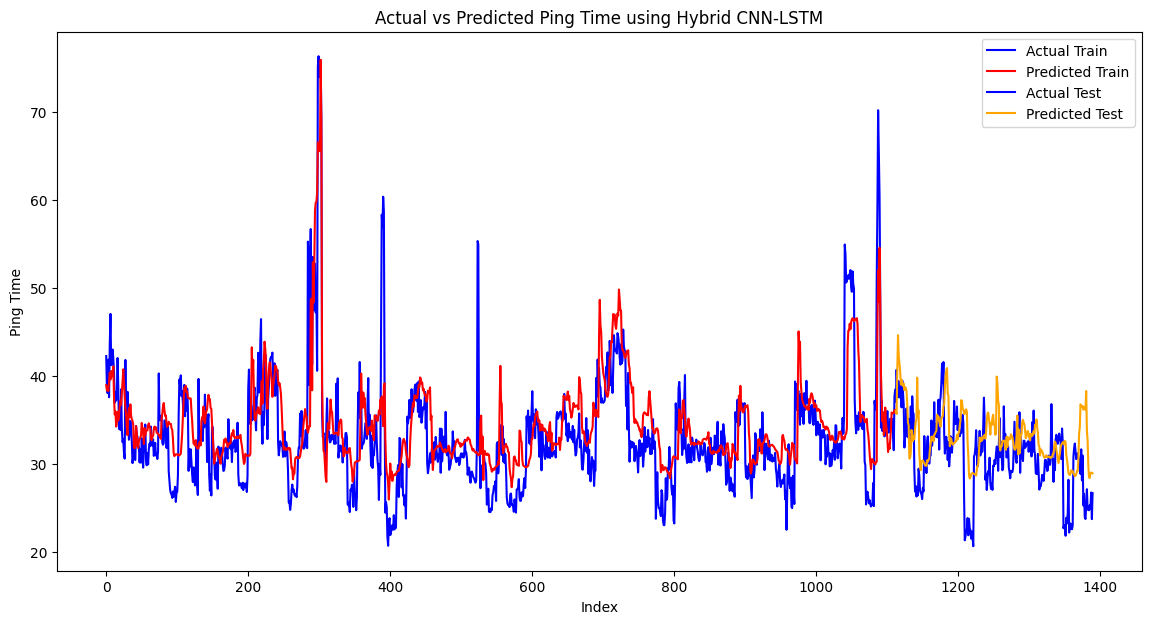

In [9]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, Dense, Dropout, MaxPooling1D, Flatten

# Step 1: Load the ping data
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Step 2: Load the coordinates data
coordinates_file_path = 'white_pixel_coordinates_xor.csv'
coordinates_df = pd.read_csv(coordinates_file_path, names=['Timestamp', 'x', 'y'])

# Convert the timestamps in coordinates_df to UTC and round to the nearest second
coordinates_df['UTC Time'] = pd.to_datetime(coordinates_df['Timestamp'], format='%Y-%m-%d %H:%M:%S', utc=True)
coordinates_df['Rounded Time'] = coordinates_df['UTC Time'].dt.round('S')

# Merge the coordinates data with the filtered average ping data
merged_df = pd.merge(average_ping_per_second, coordinates_df, on='Rounded Time', how='inner')

# Step 3: Create the new DataFrame
final_df = merged_df[['Rounded Time', 'Ping Time', 'x', 'y']]

# Step 4: Prepare the data for LSTM
# Sort by Rounded Time
final_df = final_df.sort_values('Rounded Time')

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(final_df[['Ping Time', 'x', 'y']])

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 10
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Step 5: Define the hybrid CNN-LSTM model
def create_hybrid_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(SEQ_LENGTH, 3)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(SEQ_LENGTH * 3))
    model.add(Reshape((SEQ_LENGTH, 3)))
    model.add(LSTM(150, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(150, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

hybrid_model = create_hybrid_model()

# Step 6: Train the hybrid model
hybrid_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=2)

# Step 7: Evaluate the hybrid model
y_train_pred = hybrid_model.predict(X_train)
y_test_pred = hybrid_model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred, X_train[:, -1, 1:]), axis=1))[:, 0]
y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred, X_test[:, -1, 1:]), axis=1))[:, 0]

y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Hybrid CNN-LSTM Model:')
print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'Testing R^2 Score: {test_r2}')
print('-'*30)

# Step 8: Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_train)), y_train, color='blue', label='Actual Train')
plt.plot(range(len(y_train)), y_train_pred, color='red', label='Predicted Train')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', label='Actual Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, color='orange', label='Predicted Test')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using Hybrid CNN-LSTM')
plt.show()


Epoch 1/20
257/257 - 6s - loss: 0.0043 - 6s/epoch - 24ms/step
Epoch 2/20
257/257 - 4s - loss: 0.0028 - 4s/epoch - 17ms/step
Epoch 3/20
257/257 - 4s - loss: 0.0027 - 4s/epoch - 16ms/step
Epoch 4/20
257/257 - 4s - loss: 0.0026 - 4s/epoch - 16ms/step
Epoch 5/20
257/257 - 4s - loss: 0.0025 - 4s/epoch - 16ms/step
Epoch 6/20
257/257 - 4s - loss: 0.0024 - 4s/epoch - 15ms/step
Epoch 7/20
257/257 - 4s - loss: 0.0025 - 4s/epoch - 14ms/step
Epoch 8/20
257/257 - 4s - loss: 0.0025 - 4s/epoch - 14ms/step
Epoch 9/20
257/257 - 4s - loss: 0.0024 - 4s/epoch - 14ms/step
Epoch 10/20
257/257 - 4s - loss: 0.0023 - 4s/epoch - 14ms/step
Epoch 11/20
257/257 - 4s - loss: 0.0023 - 4s/epoch - 14ms/step
Epoch 12/20
257/257 - 4s - loss: 0.0024 - 4s/epoch - 14ms/step
Epoch 13/20
257/257 - 4s - loss: 0.0024 - 4s/epoch - 14ms/step
Epoch 14/20
257/257 - 4s - loss: 0.0023 - 4s/epoch - 14ms/step
Epoch 15/20
257/257 - 4s - loss: 0.0023 - 4s/epoch - 14ms/step
Epoch 16/20
257/257 - 4s - loss: 0.0024 - 4s/epoch - 14ms/step
E

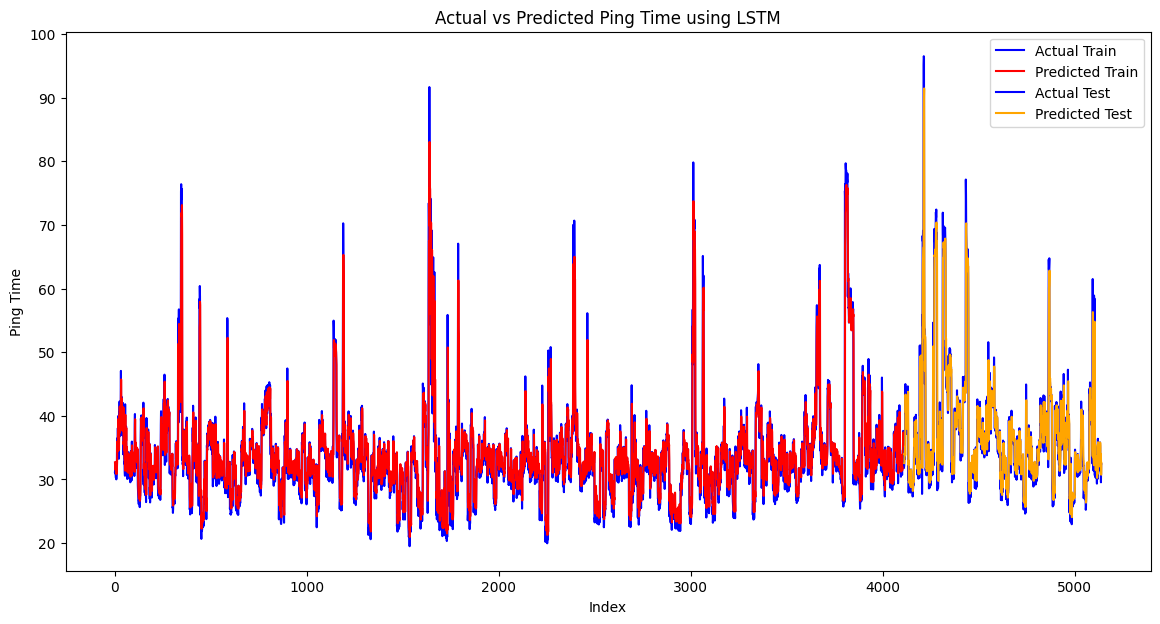

In [11]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Load the ping data
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Step 2: Prepare the data for LSTM
# Sort by Rounded Time
average_ping_per_second = average_ping_per_second.sort_values('Rounded Time')

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(average_ping_per_second[['Ping Time']])

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 10
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Step 3: Define the LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(150, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

lstm_model = create_lstm_model()

# Step 4: Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=2)

# Step 5: Evaluate the LSTM model
y_train_pred = lstm_model.predict(X_train)
y_test_pred = lstm_model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('LSTM Model:')
print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'Testing R^2 Score: {test_r2}')
print('-'*30)

# Step 6: Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_train)), y_train, color='blue', label='Actual Train')
plt.plot(range(len(y_train)), y_train_pred, color='red', label='Predicted Train')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', label='Actual Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, color='orange', label='Predicted Test')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using LSTM')
plt.show()


Epoch 1/20
129/129 - 6s - loss: 0.0056 - 6s/epoch - 43ms/step
Epoch 2/20
129/129 - 3s - loss: 0.0037 - 3s/epoch - 21ms/step
Epoch 3/20
129/129 - 3s - loss: 0.0033 - 3s/epoch - 21ms/step
Epoch 4/20
129/129 - 3s - loss: 0.0030 - 3s/epoch - 20ms/step
Epoch 5/20
129/129 - 3s - loss: 0.0029 - 3s/epoch - 21ms/step
Epoch 6/20
129/129 - 3s - loss: 0.0026 - 3s/epoch - 20ms/step
Epoch 7/20
129/129 - 3s - loss: 0.0026 - 3s/epoch - 21ms/step
Epoch 8/20
129/129 - 3s - loss: 0.0025 - 3s/epoch - 20ms/step
Epoch 9/20
129/129 - 3s - loss: 0.0026 - 3s/epoch - 20ms/step
Epoch 10/20
129/129 - 3s - loss: 0.0025 - 3s/epoch - 20ms/step
Epoch 11/20
129/129 - 3s - loss: 0.0024 - 3s/epoch - 21ms/step
Epoch 12/20
129/129 - 3s - loss: 0.0024 - 3s/epoch - 20ms/step
Epoch 13/20
129/129 - 3s - loss: 0.0024 - 3s/epoch - 21ms/step
Epoch 14/20
129/129 - 3s - loss: 0.0024 - 3s/epoch - 21ms/step
Epoch 15/20
129/129 - 3s - loss: 0.0023 - 3s/epoch - 21ms/step
Epoch 16/20
129/129 - 3s - loss: 0.0022 - 3s/epoch - 20ms/step
E

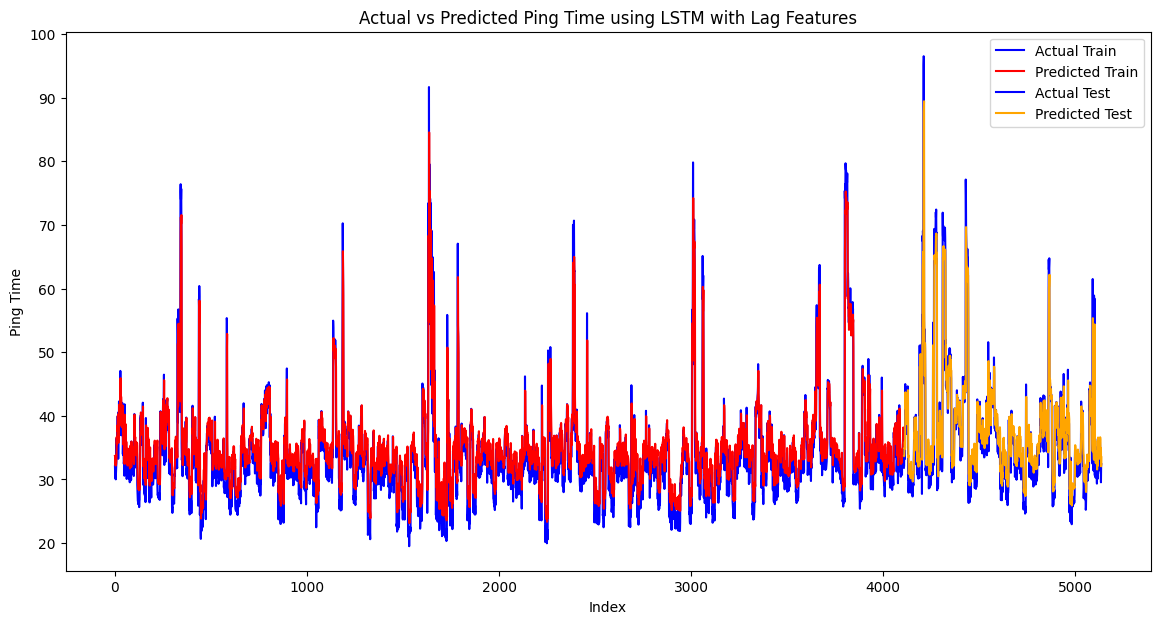

In [12]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Load the ping data
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Step 2: Feature Engineering - Adding Lag Features
average_ping_per_second['Lag_1'] = average_ping_per_second['Ping Time'].shift(1)
average_ping_per_second['Lag_2'] = average_ping_per_second['Ping Time'].shift(2)
average_ping_per_second['Lag_3'] = average_ping_per_second['Ping Time'].shift(3)
average_ping_per_second.dropna(inplace=True)

# Step 3: Prepare the data for LSTM
# Sort by Rounded Time
average_ping_per_second = average_ping_per_second.sort_values('Rounded Time')

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(average_ping_per_second[['Ping Time', 'Lag_1', 'Lag_2', 'Lag_3']])

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 10
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Step 4: Define the LSTM model with additional lag features
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(SEQ_LENGTH, 4)))  # Update input shape to 4 features
    model.add(Dropout(0.2))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

lstm_model = create_lstm_model()

# Step 5: Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

# Step 6: Evaluate the LSTM model
y_train_pred = lstm_model.predict(X_train)
y_test_pred = lstm_model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred, X_train[:, -1, 1:]), axis=1))[:, 0]
y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred, X_test[:, -1, 1:]), axis=1))[:, 0]

y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('LSTM Model with Lag Features:')
print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'Testing R^2 Score: {test_r2}')
print('-'*30)

# Step 7: Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_train)), y_train, color='blue', label='Actual Train')
plt.plot(range(len(y_train)), y_train_pred, color='red', label='Predicted Train')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', label='Actual Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, color='orange', label='Predicted Test')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using LSTM with Lag Features')
plt.show()


Epoch 1/50
116/116 - 8s - loss: 0.0067 - val_loss: 0.0086 - 8s/epoch - 70ms/step
Epoch 2/50
116/116 - 3s - loss: 0.0050 - val_loss: 0.0062 - 3s/epoch - 23ms/step
Epoch 3/50
116/116 - 3s - loss: 0.0041 - val_loss: 0.0072 - 3s/epoch - 23ms/step
Epoch 4/50
116/116 - 3s - loss: 0.0036 - val_loss: 0.0041 - 3s/epoch - 24ms/step
Epoch 5/50
116/116 - 3s - loss: 0.0033 - val_loss: 0.0037 - 3s/epoch - 24ms/step
Epoch 6/50
116/116 - 3s - loss: 0.0030 - val_loss: 0.0035 - 3s/epoch - 24ms/step
Epoch 7/50
116/116 - 3s - loss: 0.0027 - val_loss: 0.0032 - 3s/epoch - 24ms/step
Epoch 8/50
116/116 - 3s - loss: 0.0027 - val_loss: 0.0034 - 3s/epoch - 24ms/step
Epoch 9/50
116/116 - 3s - loss: 0.0026 - val_loss: 0.0029 - 3s/epoch - 24ms/step
Epoch 10/50
116/116 - 3s - loss: 0.0024 - val_loss: 0.0034 - 3s/epoch - 24ms/step
Epoch 11/50
116/116 - 3s - loss: 0.0026 - val_loss: 0.0028 - 3s/epoch - 24ms/step
Epoch 12/50
116/116 - 3s - loss: 0.0025 - val_loss: 0.0036 - 3s/epoch - 24ms/step
Epoch 13/50
116/116 - 3s 

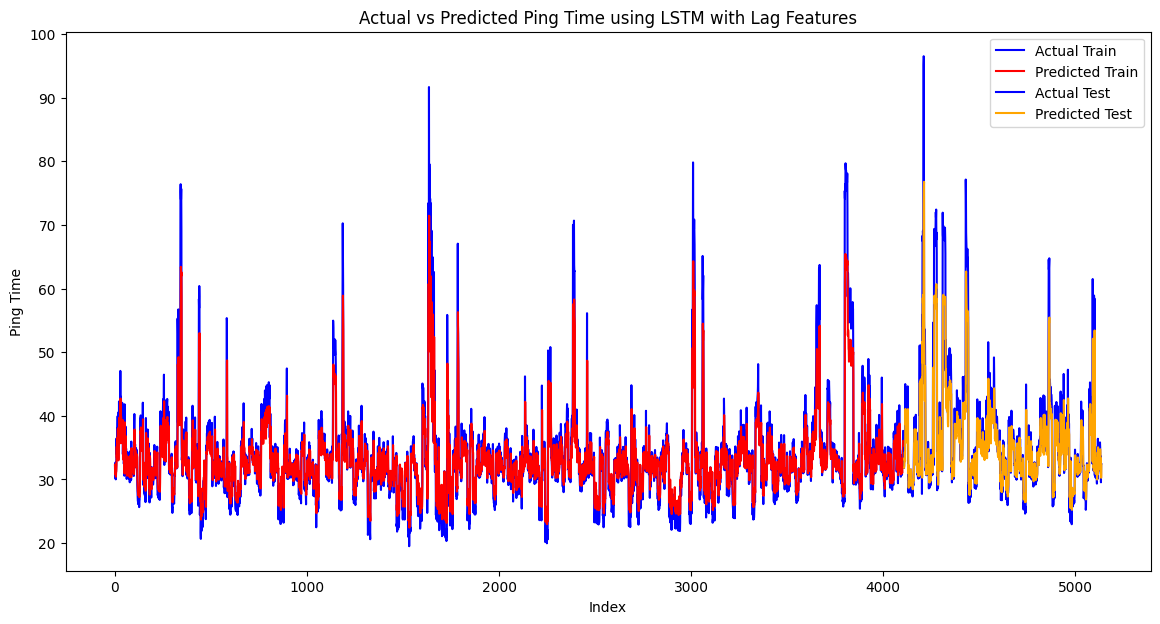

In [13]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Load the ping data
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Step 2: Feature Engineering - Adding Lag Features
average_ping_per_second['Lag_1'] = average_ping_per_second['Ping Time'].shift(1)
average_ping_per_second['Lag_2'] = average_ping_per_second['Ping Time'].shift(2)
average_ping_per_second['Lag_3'] = average_ping_per_second['Ping Time'].shift(3)
average_ping_per_second.dropna(inplace=True)

# Step 3: Prepare the data for LSTM
# Sort by Rounded Time
average_ping_per_second = average_ping_per_second.sort_values('Rounded Time')

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(average_ping_per_second[['Ping Time', 'Lag_1', 'Lag_2', 'Lag_3']])

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 10
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Step 4: Define the LSTM model with additional lag features
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(SEQ_LENGTH, 4)))  # Update input shape to 4 features
    model.add(Dropout(0.2))
    model.add(LSTM(100, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

lstm_model = create_lstm_model()

# Step 5: Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2, validation_split=0.1)

# Step 6: Evaluate the LSTM model
y_train_pred = lstm_model.predict(X_train)
y_test_pred = lstm_model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred, X_train[:, -1, 1:]), axis=1))[:, 0]
y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred, X_test[:, -1, 1:]), axis=1))[:, 0]

y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('LSTM Model with Lag Features:')
print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'Testing R^2 Score: {test_r2}')
print('-'*30)

# Step 7: Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_train)), y_train, color='blue', label='Actual Train')
plt.plot(range(len(y_train)), y_train_pred, color='red', label='Predicted Train')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', label='Actual Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, color='orange', label='Predicted Test')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using LSTM with Lag Features')
plt.show()


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best: 0.710128 using {'batch_size': 32, 'epochs': 50, 'model__units': 100, 'optimizer': 'rmsprop'}
Epoch 1/50
129/129 - 4s - loss: 0.0030 - 4s/epoch - 31ms/step
Epoch 2/50
129/129 - 4s - loss: 0.0033 - 4s/epoch - 30ms/step
Epoch 3/50
129/129 - 4s - loss: 0.0032 - 4s/epoch - 30ms/step
Epoch 4/50
129/129 - 4s - loss: 0.0030 - 4s/epoch - 30ms/step
Epoch 5/50
129/129 - 4s - loss: 0.0030 - 4s/epoch - 31ms/step
Epoch 6/50
129/129 - 4s - loss: 0.0029 - 4s/epoch - 31ms/step
Epoch 7/50
129/129 - 4s - loss: 0.0031 - 4s/epoch - 31ms/step
Epoch 8/50
129/129 - 4s - loss: 0.0031 - 4s/epoch - 29ms/step
Epoch 9/50
129/129 - 4s - loss: 0.0033 - 4s/epoch - 28ms/step
Epoch 10/50
129/129 - 3s - loss: 0.0031 - 3s/epoch - 27ms/step
Epoch 11/50
129/129 - 3s - loss: 0.0031 - 3s/epoch - 26ms/step
Epoch 12/50
129/129 - 3s - loss: 0.0031 - 3s/epoch - 25ms/step
Epoch 13/50
129/129 - 3s - loss: 0.0030 - 3s/epoch - 26ms/step
Epoch 14/50
129/129 - 3s - lo

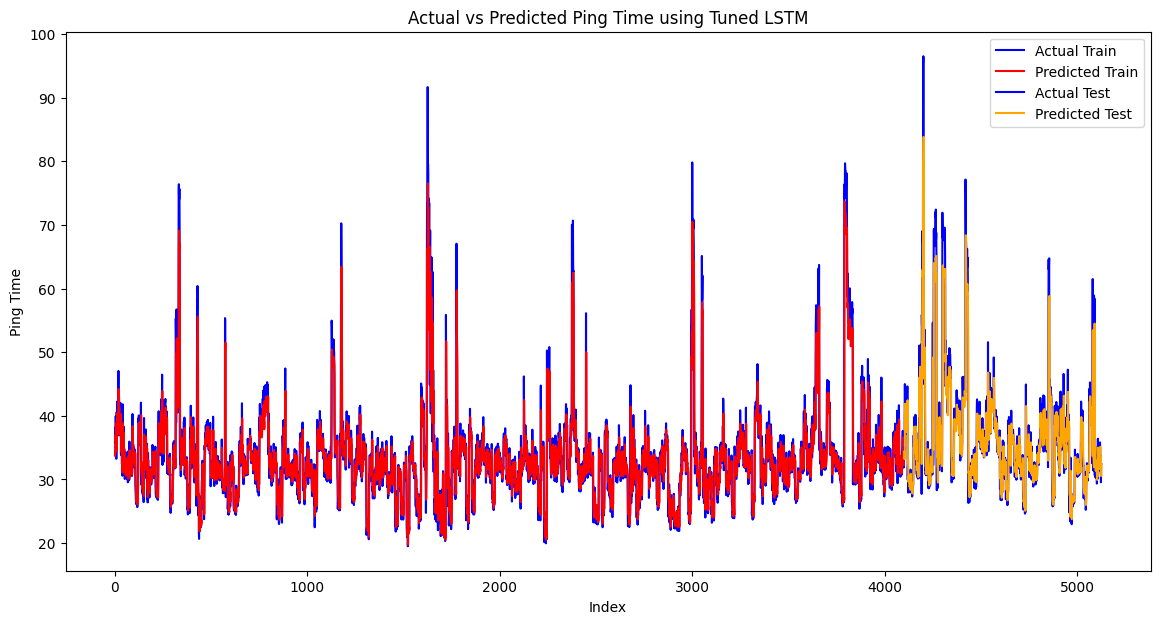

In [15]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop

# Step 1: Load the ping data
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Step 2: Feature Engineering - Adding Lag Features
average_ping_per_second['Lag_1'] = average_ping_per_second['Ping Time'].shift(1)
average_ping_per_second['Lag_2'] = average_ping_per_second['Ping Time'].shift(2)
average_ping_per_second['Lag_3'] = average_ping_per_second['Ping Time'].shift(3)
average_ping_per_second.dropna(inplace=True)

# Step 3: Prepare the data for LSTM
# Sort by Rounded Time
average_ping_per_second = average_ping_per_second.sort_values('Rounded Time')

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(average_ping_per_second[['Ping Time', 'Lag_1', 'Lag_2', 'Lag_3']])

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 20
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Step 4: Define the model creation function
def create_model(units=50, optimizer='adam', dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(SEQ_LENGTH, 4)))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(LSTM(units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Step 5: Wrap the model using KerasRegressor from SciKeras
model = KerasRegressor(model=create_model, verbose=0, dropout_rate=0.2)

# Step 6: Define the grid search parameters
param_grid = {
    'model__units': [50, 100, 150],
    'batch_size': [16, 32, 64],
    'epochs': [20, 50],
    'optimizer': ['adam', 'rmsprop']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_result = grid.fit(X_train, y_train)

# Step 7: Summarize the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Step 8: Train the best model
best_model = grid_result.best_estimator_.model_
best_model.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], verbose=2)

# Step 9: Evaluate the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred, X_train[:, -1, 1:]), axis=1))[:, 0]
y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred, X_test[:, -1, 1:]), axis=1))[:, 0]

y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Tuned LSTM Model:')
print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'Testing R^2 Score: {test_r2}')
print('-'*30)

# Step 10: Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_train)), y_train, color='blue', label='Actual Train')
plt.plot(range(len(y_train)), y_train_pred, color='red', label='Predicted Train')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', label='Actual Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, color='orange', label='Predicted Test')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using Tuned LSTM')
plt.show()


Epoch 1/50
103/103 - 14s - loss: 0.8605 - 14s/epoch - 133ms/step
Epoch 2/50
103/103 - 5s - loss: 0.3337 - 5s/epoch - 53ms/step
Epoch 3/50
103/103 - 5s - loss: 0.2160 - 5s/epoch - 45ms/step
Epoch 4/50
103/103 - 3s - loss: 0.1221 - 3s/epoch - 32ms/step
Epoch 5/50
103/103 - 6s - loss: 0.0668 - 6s/epoch - 60ms/step
Epoch 6/50
103/103 - 6s - loss: 0.0297 - 6s/epoch - 60ms/step
Epoch 7/50
103/103 - 6s - loss: 0.0153 - 6s/epoch - 61ms/step
Epoch 8/50
103/103 - 6s - loss: 0.0091 - 6s/epoch - 62ms/step
Epoch 9/50
103/103 - 6s - loss: 0.0063 - 6s/epoch - 62ms/step
Epoch 10/50
103/103 - 6s - loss: 0.0051 - 6s/epoch - 62ms/step
Epoch 11/50
103/103 - 6s - loss: 0.0048 - 6s/epoch - 62ms/step
Epoch 12/50
103/103 - 6s - loss: 0.0044 - 6s/epoch - 60ms/step
Epoch 13/50
103/103 - 5s - loss: 0.0041 - 5s/epoch - 51ms/step
Epoch 14/50
103/103 - 6s - loss: 0.0040 - 6s/epoch - 59ms/step
Epoch 15/50
103/103 - 6s - loss: 0.0039 - 6s/epoch - 61ms/step
Epoch 16/50
103/103 - 6s - loss: 0.0039 - 6s/epoch - 61ms/ste

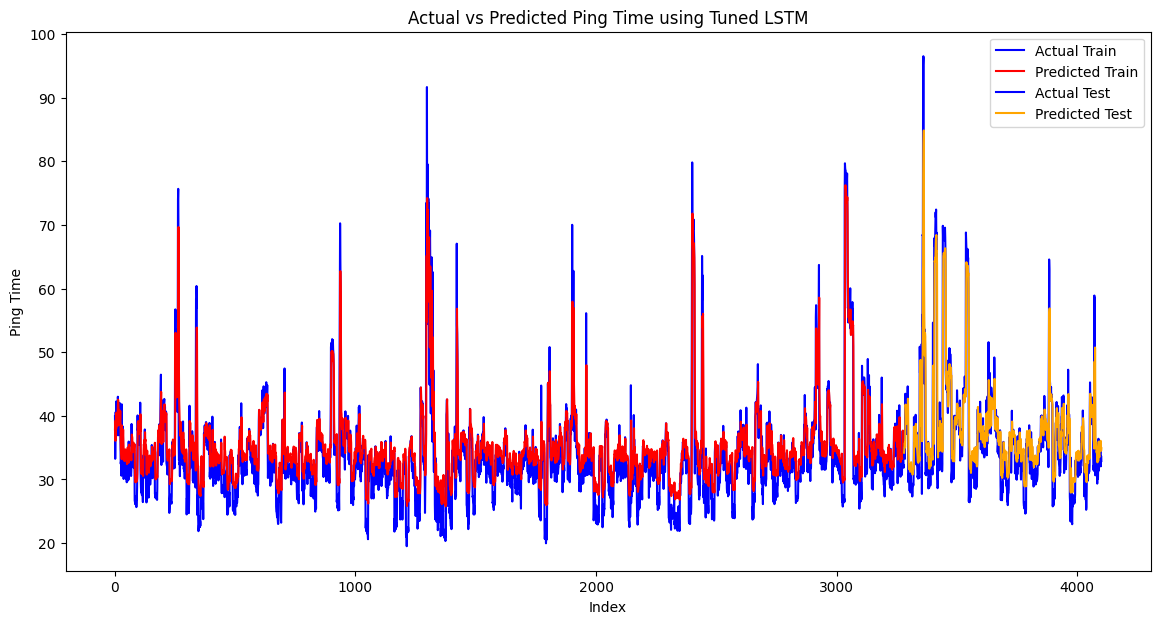

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Step 1: Load the ping data
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Step 2: Feature Engineering - Adding Indicators for Specific Seconds
average_ping_per_second['Second'] = average_ping_per_second['Rounded Time'].dt.second
average_ping_per_second['Is_Handover'] = average_ping_per_second['Second'].apply(lambda x: 1 if x in [12, 27, 42, 57] else 0)

# Step 3: Conditional Lag Features
average_ping_per_second['Lag_1'] = average_ping_per_second['Ping Time'].shift(1)
average_ping_per_second['Lag_2'] = average_ping_per_second['Ping Time'].shift(2)
average_ping_per_second['Lag_3'] = average_ping_per_second['Ping Time'].shift(3)

def apply_conditional_lags(row):
    second = row['Second']
    if second in [12, 27, 42, 57]:
        return pd.Series({'Ping Time': row['Ping Time'], 'Lag_1': 0, 'Lag_2': 0, 'Lag_3': 0, 'Second': row['Second'], 'Is_Handover': row['Is_Handover']})
    elif second in [13, 28, 43, 58]:
        return pd.Series({'Ping Time': row['Ping Time'], 'Lag_1': row['Lag_1'], 'Lag_2': 0, 'Lag_3': 0, 'Second': row['Second'], 'Is_Handover': row['Is_Handover']})
    elif second in [14, 29, 44, 59]:
        return pd.Series({'Ping Time': row['Ping Time'], 'Lag_1': row['Lag_1'], 'Lag_2': row['Lag_2'], 'Lag_3': 0, 'Second': row['Second'], 'Is_Handover': row['Is_Handover']})
    else:
        return row

average_ping_per_second = average_ping_per_second.apply(apply_conditional_lags, axis=1)
average_ping_per_second.dropna(inplace=True)

# Step 4: Prepare the data for LSTM
# Sort by Rounded Time
average_ping_per_second = average_ping_per_second.sort_values('Rounded Time')

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(average_ping_per_second[['Ping Time', 'Lag_1', 'Lag_2', 'Lag_3', 'Is_Handover']])

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 20
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Step 5: Define the model with specified hyperparameters
def create_best_model():
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(SEQ_LENGTH, 5)))  # Update input shape to 5 features
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(100, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mean_squared_error')
    return model

best_model = create_best_model()

# Step 6: Train the best model
best_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Step 7: Evaluate the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred, X_train[:, -1, 1:]), axis=1))[:, 0]
y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred, X_test[:, -1, 1:]), axis=1))[:, 0]

y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Tuned LSTM Model:')
print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'Testing R^2 Score: {test_r2}')
print('-'*30)

# Step 8: Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_train)), y_train, color='blue', label='Actual Train')
plt.plot(range(len(y_train)), y_train_pred, color='red', label='Predicted Train')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', label='Actual Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, color='orange', label='Predicted Test')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using Tuned LSTM')
plt.show()


Epoch 1/50
129/129 - 16s - loss: 0.5189 - 16s/epoch - 125ms/step
Epoch 2/50
129/129 - 8s - loss: 0.2334 - 8s/epoch - 62ms/step
Epoch 3/50
129/129 - 8s - loss: 0.1089 - 8s/epoch - 61ms/step
Epoch 4/50
129/129 - 8s - loss: 0.0507 - 8s/epoch - 59ms/step
Epoch 5/50
129/129 - 8s - loss: 0.0206 - 8s/epoch - 58ms/step
Epoch 6/50
129/129 - 8s - loss: 0.0098 - 8s/epoch - 62ms/step
Epoch 7/50
129/129 - 8s - loss: 0.0060 - 8s/epoch - 62ms/step
Epoch 8/50
129/129 - 8s - loss: 0.0049 - 8s/epoch - 62ms/step
Epoch 9/50
129/129 - 8s - loss: 0.0042 - 8s/epoch - 62ms/step
Epoch 10/50
129/129 - 8s - loss: 0.0038 - 8s/epoch - 61ms/step
Epoch 11/50
129/129 - 8s - loss: 0.0037 - 8s/epoch - 62ms/step
Epoch 12/50
129/129 - 8s - loss: 0.0036 - 8s/epoch - 58ms/step
Epoch 13/50
129/129 - 8s - loss: 0.0036 - 8s/epoch - 62ms/step
Epoch 14/50
129/129 - 8s - loss: 0.0036 - 8s/epoch - 62ms/step
Epoch 15/50
129/129 - 8s - loss: 0.0038 - 8s/epoch - 61ms/step
Epoch 16/50
129/129 - 8s - loss: 0.0035 - 8s/epoch - 61ms/ste

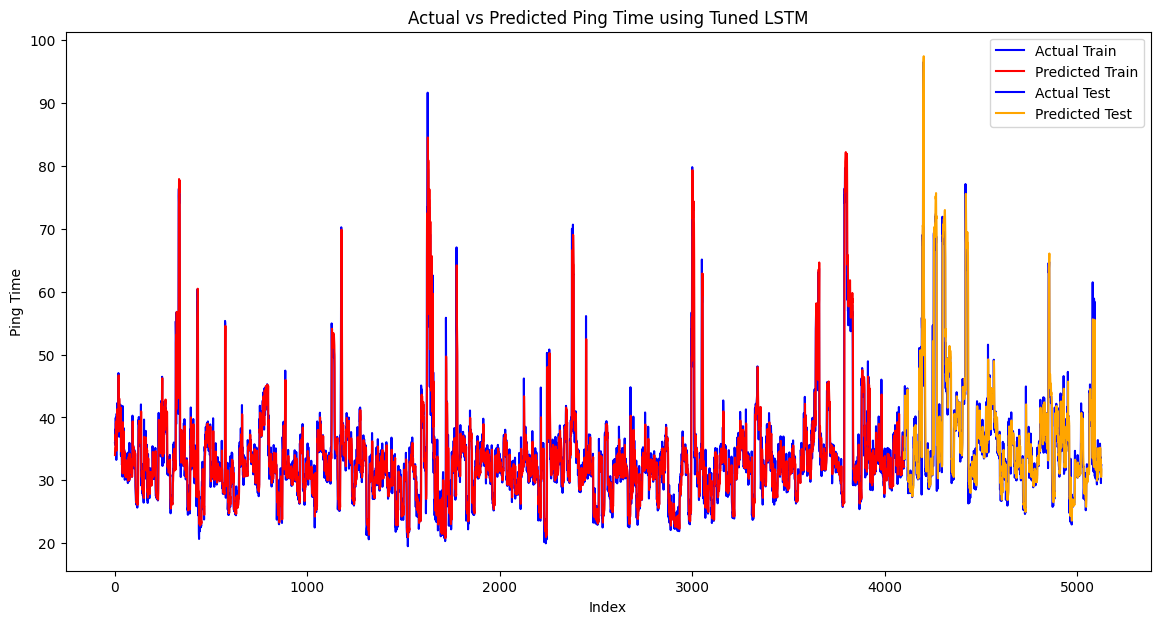

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop

# Step 1: Load the ping data
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Step 2: Feature Engineering - Adding Lag Features
average_ping_per_second['Lag_1'] = average_ping_per_second['Ping Time'].shift(1)
average_ping_per_second['Lag_2'] = average_ping_per_second['Ping Time'].shift(2)
average_ping_per_second['Lag_3'] = average_ping_per_second['Ping Time'].shift(3)
average_ping_per_second.dropna(inplace=True)

# Step 3: Prepare the data for LSTM
# Sort by Rounded Time
average_ping_per_second = average_ping_per_second.sort_values('Rounded Time')

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(average_ping_per_second[['Ping Time', 'Lag_1', 'Lag_2', 'Lag_3']])

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 20
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Step 4: Define the model creation function
def create_model(units=100, optimizer='rmsprop', dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(SEQ_LENGTH, 4)))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(LSTM(units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Step 5: Wrap the model using KerasRegressor from SciKeras
model = KerasRegressor(model=create_model, verbose=0, dropout_rate=0.2, units=100, optimizer='rmsprop')

# Step 6: Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Step 7: Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Tuned LSTM Model:')
print(f'Training Mean Absolute Error: {train_mae}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Absolute Error: {test_mae}')
print(f'Testing R^2 Score: {test_r2}')
print('-'*30)

# Step 8: Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_train)), y_train, color='blue', label='Actual Train')
plt.plot(range(len(y_train)), y_train_pred, color='red', label='Predicted Train')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', label='Actual Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, color='orange', label='Predicted Test')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using Tuned LSTM')
plt.show()


Epoch 1/50
414/414 - 11s - loss: 0.3102 - 11s/epoch - 27ms/step
Epoch 2/50
414/414 - 10s - loss: 0.0264 - 10s/epoch - 23ms/step
Epoch 3/50
414/414 - 10s - loss: 0.0080 - 10s/epoch - 24ms/step
Epoch 4/50
414/414 - 10s - loss: 0.0061 - 10s/epoch - 25ms/step
Epoch 5/50
414/414 - 10s - loss: 0.0058 - 10s/epoch - 23ms/step
Epoch 6/50
414/414 - 9s - loss: 0.0057 - 9s/epoch - 21ms/step
Epoch 7/50
414/414 - 10s - loss: 0.0055 - 10s/epoch - 24ms/step
Epoch 8/50
414/414 - 10s - loss: 0.0055 - 10s/epoch - 24ms/step
Epoch 9/50
414/414 - 9s - loss: 0.0056 - 9s/epoch - 22ms/step
Epoch 10/50
414/414 - 8s - loss: 0.0054 - 8s/epoch - 20ms/step
Epoch 11/50
414/414 - 9s - loss: 0.0054 - 9s/epoch - 22ms/step
Epoch 12/50
414/414 - 9s - loss: 0.0052 - 9s/epoch - 21ms/step
Epoch 13/50
414/414 - 9s - loss: 0.0052 - 9s/epoch - 21ms/step
Epoch 14/50
414/414 - 9s - loss: 0.0052 - 9s/epoch - 21ms/step
Epoch 15/50
414/414 - 8s - loss: 0.0052 - 8s/epoch - 20ms/step
Epoch 16/50
414/414 - 8s - loss: 0.0052 - 8s/epoch

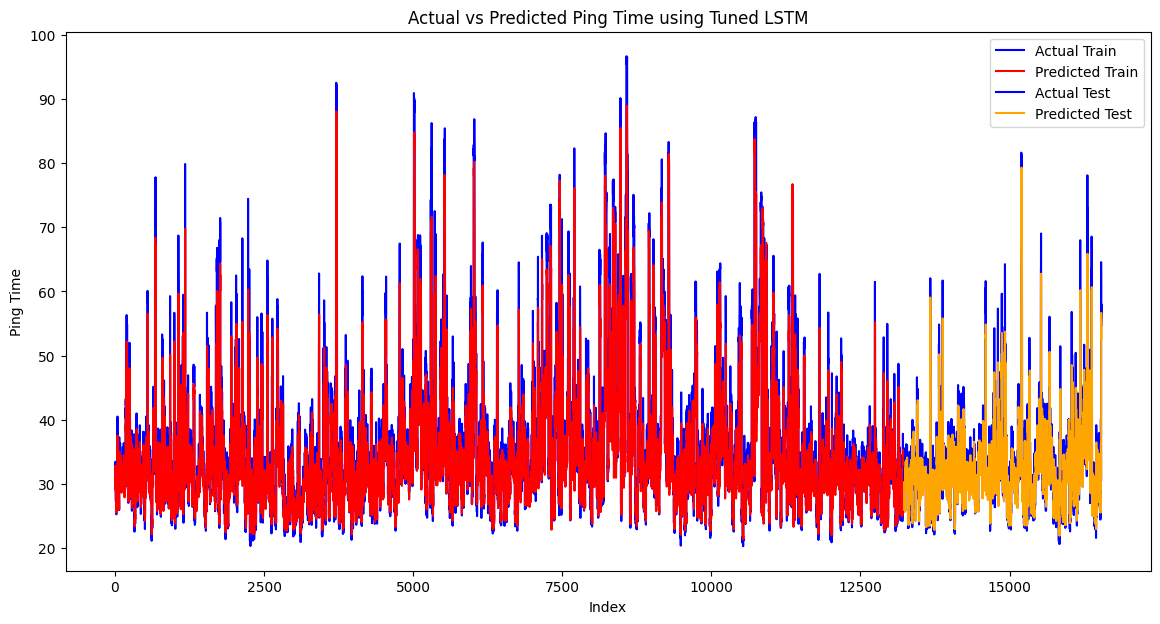

In [14]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop

# Step 1: Load the ping data
file_path = 'o1.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Step 2: Feature Engineering - Adding Lag Features
average_ping_per_second['Lag_1'] = average_ping_per_second['Ping Time'].shift(1)
average_ping_per_second['Lag_2'] = average_ping_per_second['Ping Time'].shift(2)
average_ping_per_second['Lag_3'] = average_ping_per_second['Ping Time'].shift(3)
average_ping_per_second.dropna(inplace=True)

# Step 3: Prepare the data for LSTM
# Sort by Rounded Time
average_ping_per_second = average_ping_per_second.sort_values('Rounded Time')

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(average_ping_per_second[['Ping Time', 'Lag_1', 'Lag_2', 'Lag_3']])

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 20
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Step 4: Define the model creation function
def create_model(units=100, optimizer='rmsprop', dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(SEQ_LENGTH, 4)))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(LSTM(units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Step 5: Wrap the model using KerasRegressor from SciKeras
model = KerasRegressor(model=create_model, verbose=0, dropout_rate=0.2, units=100, optimizer='rmsprop')

# Step 6: Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Step 7: Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Tuned LSTM Model:')
print(f'Training Mean Absolute Error: {train_mae}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Absolute Error: {test_mae}')
print(f'Testing R^2 Score: {test_r2}')
print('-'*30)

# Step 8: Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_train)), y_train, color='blue', label='Actual Train')
plt.plot(range(len(y_train)), y_train_pred, color='red', label='Predicted Train')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', label='Actual Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, color='orange', label='Predicted Test')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using Tuned LSTM')
plt.show()


Training LSTM model...
Epoch 1/50
414/414 - 12s - loss: 0.2336 - 12s/epoch - 28ms/step
Epoch 2/50
414/414 - 9s - loss: 0.0087 - 9s/epoch - 22ms/step
Epoch 3/50
414/414 - 9s - loss: 0.0066 - 9s/epoch - 22ms/step
Epoch 4/50
414/414 - 9s - loss: 0.0062 - 9s/epoch - 22ms/step
Epoch 5/50
414/414 - 9s - loss: 0.0058 - 9s/epoch - 22ms/step
Epoch 6/50
414/414 - 9s - loss: 0.0053 - 9s/epoch - 22ms/step
Epoch 7/50
414/414 - 9s - loss: 0.0054 - 9s/epoch - 22ms/step
Epoch 8/50
414/414 - 9s - loss: 0.0055 - 9s/epoch - 22ms/step
Epoch 9/50
414/414 - 9s - loss: 0.0053 - 9s/epoch - 22ms/step
Epoch 10/50
414/414 - 9s - loss: 0.0054 - 9s/epoch - 22ms/step
Epoch 11/50
414/414 - 9s - loss: 0.0052 - 9s/epoch - 22ms/step
Epoch 12/50
414/414 - 9s - loss: 0.0052 - 9s/epoch - 22ms/step
Epoch 13/50
414/414 - 9s - loss: 0.0052 - 9s/epoch - 22ms/step
Epoch 14/50
414/414 - 9s - loss: 0.0051 - 9s/epoch - 22ms/step
Epoch 15/50
414/414 - 9s - loss: 0.0050 - 9s/epoch - 22ms/step
Epoch 16/50
414/414 - 9s - loss: 0.0049

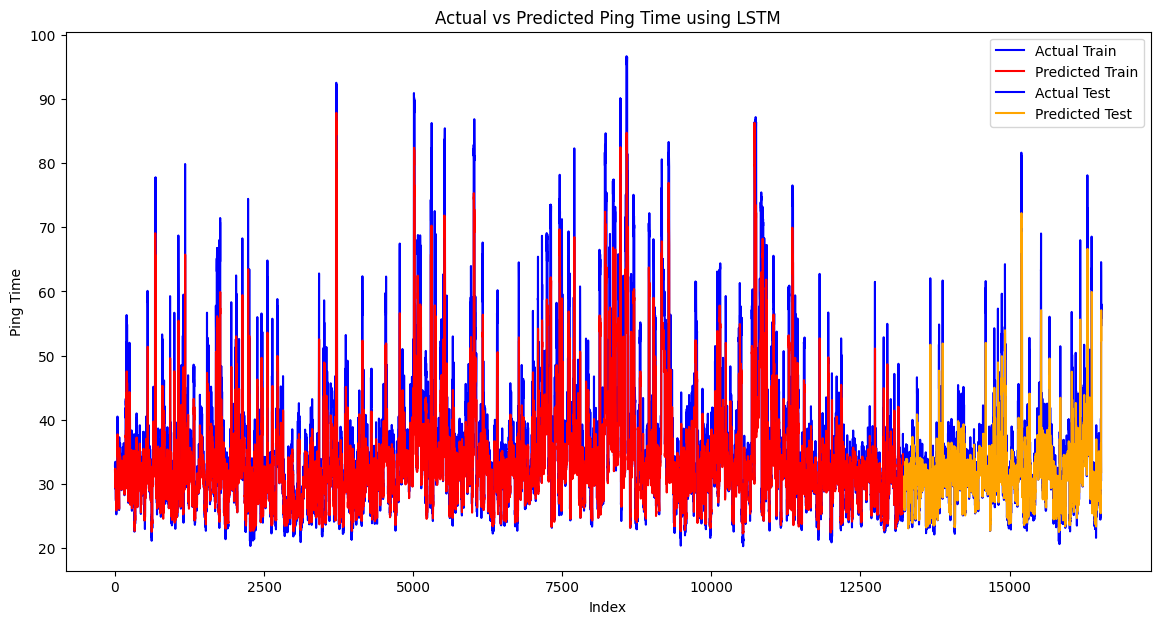

Training GRU model...
Epoch 1/50
414/414 - 10s - loss: 766.6553 - 10s/epoch - 24ms/step
Epoch 2/50
414/414 - 7s - loss: 45.2432 - 7s/epoch - 18ms/step
Epoch 3/50
414/414 - 7s - loss: 31.5193 - 7s/epoch - 18ms/step
Epoch 4/50
414/414 - 7s - loss: 30.0036 - 7s/epoch - 17ms/step
Epoch 5/50
414/414 - 7s - loss: 29.5283 - 7s/epoch - 17ms/step
Epoch 6/50
414/414 - 7s - loss: 29.3025 - 7s/epoch - 17ms/step
Epoch 7/50
414/414 - 7s - loss: 27.7720 - 7s/epoch - 18ms/step
Epoch 8/50
414/414 - 7s - loss: 28.0673 - 7s/epoch - 18ms/step
Epoch 9/50
414/414 - 7s - loss: 26.7250 - 7s/epoch - 17ms/step
Epoch 10/50
414/414 - 7s - loss: 27.3885 - 7s/epoch - 18ms/step
Epoch 11/50
414/414 - 7s - loss: 26.6808 - 7s/epoch - 18ms/step
Epoch 12/50
414/414 - 7s - loss: 26.2255 - 7s/epoch - 18ms/step
Epoch 13/50
414/414 - 7s - loss: 26.9415 - 7s/epoch - 17ms/step
Epoch 14/50
414/414 - 7s - loss: 26.4059 - 7s/epoch - 18ms/step
Epoch 15/50
414/414 - 7s - loss: 26.2443 - 7s/epoch - 18ms/step
Epoch 16/50
414/414 - 7s

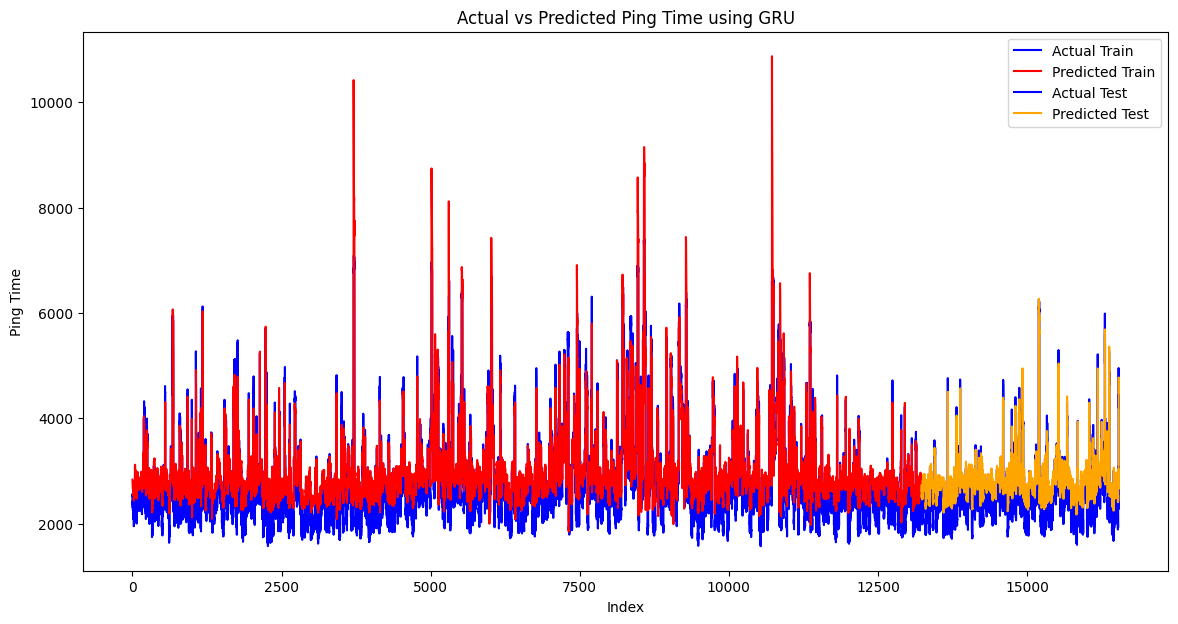

Training CNN model...
Epoch 1/50
414/414 - 2s - loss: 2937281.5000 - 2s/epoch - 4ms/step
Epoch 2/50
414/414 - 1s - loss: 598602.0000 - 908ms/epoch - 2ms/step
Epoch 3/50
414/414 - 1s - loss: 456205.6562 - 907ms/epoch - 2ms/step
Epoch 4/50
414/414 - 1s - loss: 397145.8438 - 907ms/epoch - 2ms/step
Epoch 5/50
414/414 - 1s - loss: 346976.4375 - 925ms/epoch - 2ms/step
Epoch 6/50
414/414 - 1s - loss: 311284.2500 - 947ms/epoch - 2ms/step
Epoch 7/50
414/414 - 1s - loss: 290837.5312 - 923ms/epoch - 2ms/step
Epoch 8/50
414/414 - 1s - loss: 272772.1875 - 938ms/epoch - 2ms/step
Epoch 9/50
414/414 - 1s - loss: 262406.1875 - 938ms/epoch - 2ms/step
Epoch 10/50
414/414 - 1s - loss: 246391.3125 - 938ms/epoch - 2ms/step
Epoch 11/50
414/414 - 1s - loss: 247911.5312 - 938ms/epoch - 2ms/step
Epoch 12/50
414/414 - 1s - loss: 231830.1562 - 938ms/epoch - 2ms/step
Epoch 13/50
414/414 - 1s - loss: 232381.0625 - 953ms/epoch - 2ms/step
Epoch 14/50
414/414 - 1s - loss: 229523.9531 - 938ms/epoch - 2ms/step
Epoch 15/

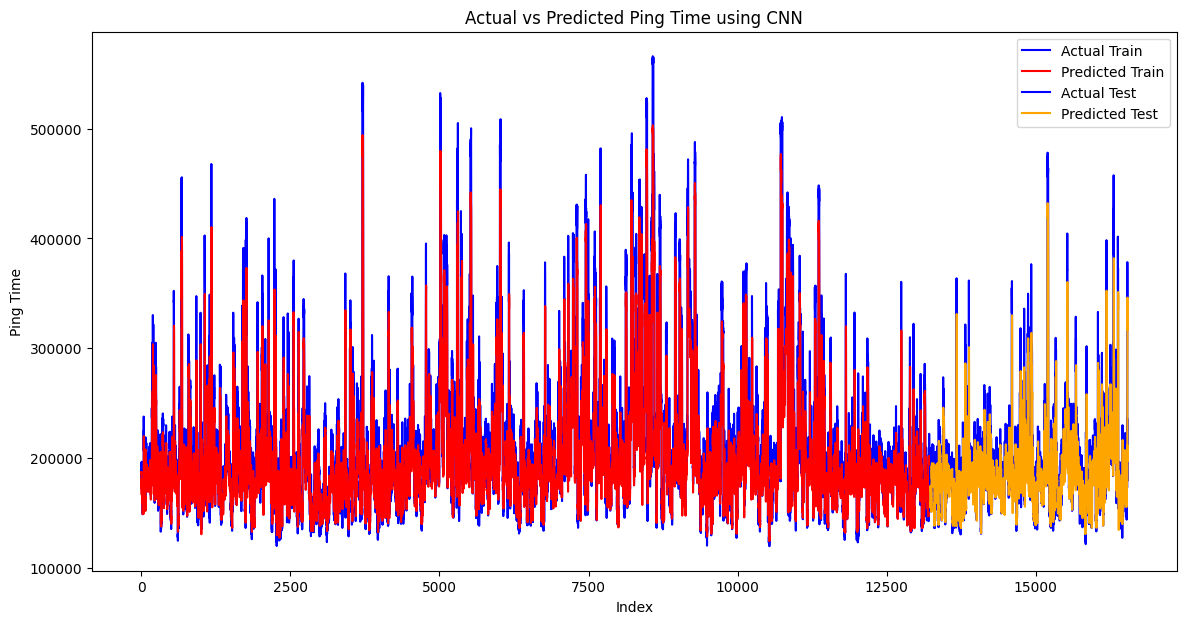

Training TCN model...
Epoch 1/50
414/414 - 2s - loss: 17006720000.0000 - 2s/epoch - 5ms/step
Epoch 2/50
414/414 - 1s - loss: 3372169984.0000 - 1s/epoch - 3ms/step
Epoch 3/50
414/414 - 1s - loss: 2851115008.0000 - 1s/epoch - 3ms/step
Epoch 4/50
414/414 - 1s - loss: 2543306752.0000 - 1s/epoch - 3ms/step
Epoch 5/50
414/414 - 1s - loss: 2234431488.0000 - 1s/epoch - 3ms/step
Epoch 6/50
414/414 - 1s - loss: 1925865600.0000 - 1s/epoch - 3ms/step
Epoch 7/50
414/414 - 1s - loss: 1760843648.0000 - 1s/epoch - 3ms/step
Epoch 8/50
414/414 - 1s - loss: 1656720896.0000 - 1s/epoch - 3ms/step
Epoch 9/50
414/414 - 1s - loss: 1595726208.0000 - 1s/epoch - 3ms/step
Epoch 10/50
414/414 - 1s - loss: 1544565632.0000 - 1s/epoch - 3ms/step
Epoch 11/50
414/414 - 1s - loss: 1479801728.0000 - 1s/epoch - 3ms/step
Epoch 12/50
414/414 - 1s - loss: 1428644864.0000 - 1s/epoch - 3ms/step
Epoch 13/50
414/414 - 1s - loss: 1398199552.0000 - 1s/epoch - 3ms/step
Epoch 14/50
414/414 - 1s - loss: 1377767168.0000 - 1s/epoch - 3

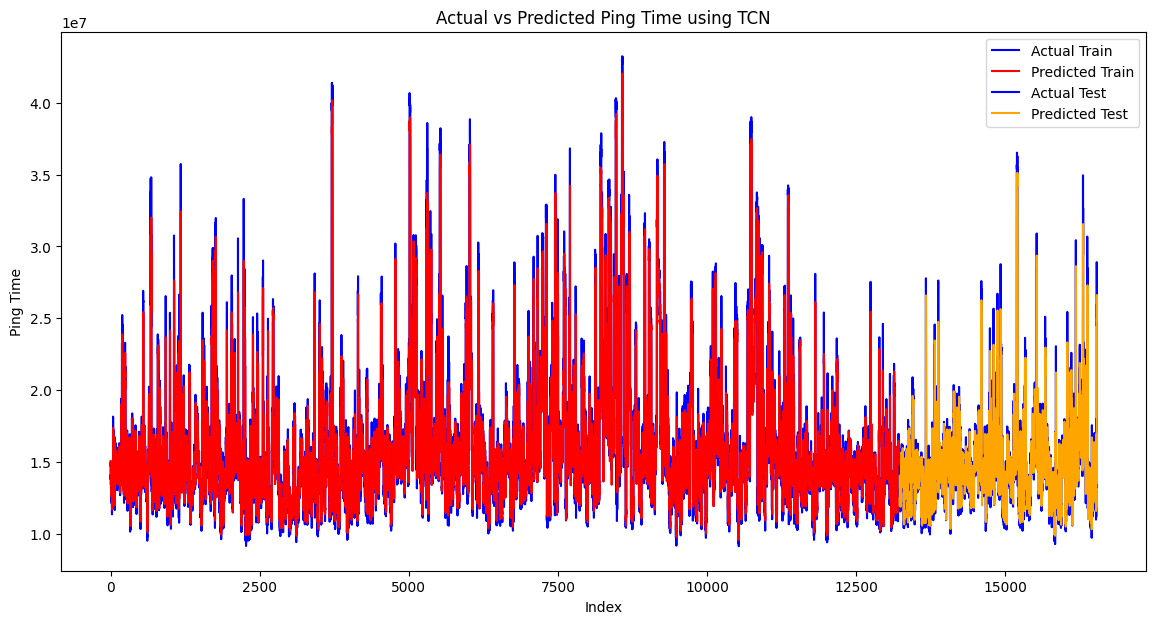

Training ARIMA model...
ARIMA Model:
Training Mean Absolute Error: 2.45959517731696
Training R^2 Score: 0.8343457601103647
Testing Mean Absolute Error: 4.6816924075500435
Testing R^2 Score: -5.0252688874152796e-05
------------------------------


ValueError: x and y must have same first dimension, but have shapes (13232,) and (13231,)

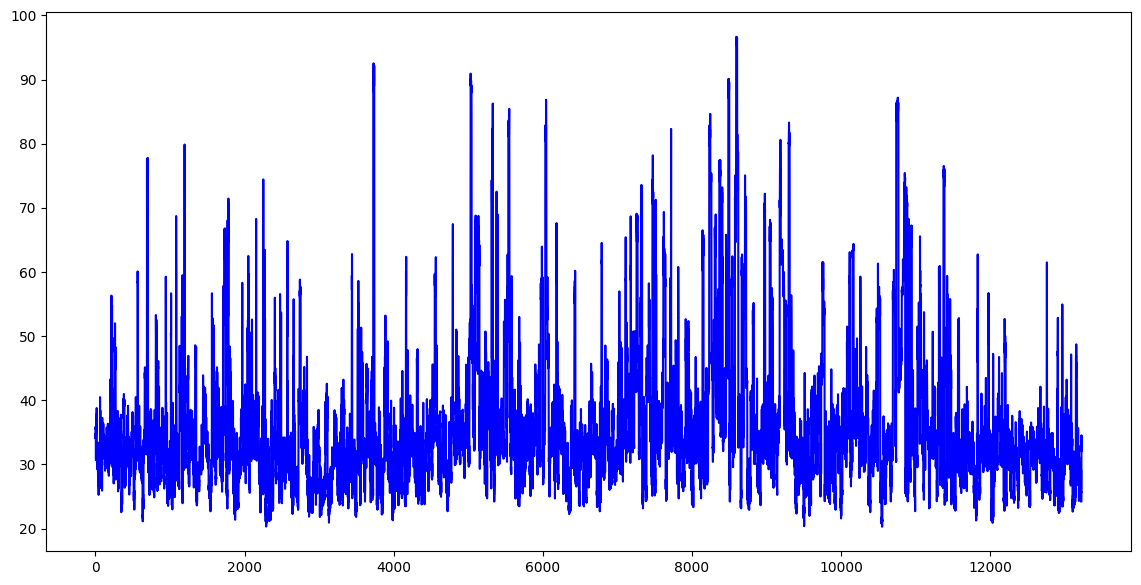

In [10]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
from statsmodels.tsa.arima.model import ARIMA

# Load the ping data
file_path = 'o1.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Feature Engineering - Adding Lag Features
average_ping_per_second['Lag_1'] = average_ping_per_second['Ping Time'].shift(1)
average_ping_per_second['Lag_2'] = average_ping_per_second['Ping Time'].shift(2)
average_ping_per_second['Lag_3'] = average_ping_per_second['Ping Time'].shift(3)
average_ping_per_second.dropna(inplace=True)

# Prepare the data for modeling
average_ping_per_second = average_ping_per_second.sort_values('Rounded Time')
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(average_ping_per_second[['Ping Time', 'Lag_1', 'Lag_2', 'Lag_3']])

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 20
X, y = create_sequences(scaled_data, SEQ_LENGTH)
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Define and train the models
def create_lstm_model(units=100, optimizer='adam', dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(SEQ_LENGTH, 4), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(LSTM(units, return_sequences=False, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

def create_gru_model(units=100, optimizer='adam', dropout_rate=0.2):
    model = Sequential()
    model.add(GRU(units, return_sequences=True, input_shape=(SEQ_LENGTH, 4), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(GRU(units, return_sequences=False, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

def create_cnn_model(filters=64, kernel_size=3, optimizer='adam', dropout_rate=0.2):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(SEQ_LENGTH, 4)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

def create_tcn_model(filters=64, kernel_size=3, optimizer='adam', dropout_rate=0.2):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, padding='causal', activation='relu', input_shape=(SEQ_LENGTH, 4)))
    model.add(Dropout(dropout_rate))
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, padding='causal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

models = {
    'LSTM': KerasRegressor(model=create_lstm_model, verbose=0, units=100, optimizer='adam', dropout_rate=0.2),
    'GRU': KerasRegressor(model=create_gru_model, verbose=0, units=100, optimizer='adam', dropout_rate=0.2),
    'CNN': KerasRegressor(model=create_cnn_model, verbose=0, filters=64, kernel_size=3, optimizer='adam', dropout_rate=0.2),
    'TCN': KerasRegressor(model=create_tcn_model, verbose=0, filters=64, kernel_size=3, optimizer='adam', dropout_rate=0.2)
}

results = {}

for name, model in models.items():
    print(f'Training {name} model...')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Inverse transform the predictions and actual values
    y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
    y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]
    
    y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
    y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]
    
    # Calculate metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results[name] = {
        'train_mae': train_mae,
        'train_r2': train_r2,
        'test_mae': test_mae,
        'test_r2': test_r2,
        'y_train': y_train,
        'y_train_pred': y_train_pred,
        'y_test': y_test,
        'y_test_pred': y_test_pred
    }

    print(f'{name} Model:')
    print(f'Training Mean Absolute Error: {train_mae}')
    print(f'Training R^2 Score: {train_r2}')
    print(f'Testing Mean Absolute Error: {test_mae}')
    print(f'Testing R^2 Score: {test_r2}')
    print('-'*30)

    # Plot each model's performance separately
    plt.figure(figsize=(14, 7))
    plt.plot(range(len(y_train)), y_train, color='blue', label='Actual Train')
    plt.plot(range(len(y_train)), y_train_pred, color='red', label='Predicted Train')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', label='Actual Test')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, color='orange', label='Predicted Test')
    plt.legend()
    plt.xlabel('Index')
    plt.ylabel('Ping Time')
    plt.title(f'Actual vs Predicted Ping Time using {name}')
    plt.show()

# ARIMA Model
print('Training ARIMA model...')
# Use original data (not scaled) for ARIMA
arima_data = average_ping_per_second['Ping Time'].values
train_arima, test_arima = arima_data[:split_idx], arima_data[split_idx:]

# Fit ARIMA model
arima_order = (5, 1, 0)  # Example order, should be optimized
arima_model = ARIMA(train_arima, order=arima_order)
arima_model_fit = arima_model.fit()

# Predict
y_train_pred_arima = arima_model_fit.predict(start=1, end=len(train_arima) - 1)
y_test_pred_arima = arima_model_fit.predict(start=len(train_arima), end=len(train_arima) + len(test_arima) - 1)

# Calculate metrics
train_mae_arima = mean_absolute_error(train_arima[1:], y_train_pred_arima)
train_r2_arima = r2_score(train_arima[1:], y_train_pred_arima)
test_mae_arima = mean_absolute_error(test_arima, y_test_pred_arima)
test_r2_arima = r2_score(test_arima, y_test_pred_arima)

results['ARIMA'] = {
    'train_mae': train_mae_arima,
    'train_r2': train_r2_arima,
    'test_mae': test_mae_arima,
    'test_r2': test_r2_arima,
    'y_train': train_arima,
    'y_train_pred': y_train_pred_arima,
    'y_test': test_arima,
    'y_test_pred': y_test_pred_arima
}

print(f'ARIMA Model:')
print(f'Training Mean Absolute Error: {train_mae_arima}')
print(f'Training R^2 Score: {train_r2_arima}')
print(f'Testing Mean Absolute Error: {test_mae_arima}')
print(f'Testing R^2 Score: {test_r2_arima}')
print('-'*30)

# Plot ARIMA model's performance
plt.figure(figsize=(14, 7))
plt.plot(range(len(results['ARIMA']['y_train'])), results['ARIMA']['y_train'], color='blue', label='Actual Train')
plt.plot(range(len(results['ARIMA']['y_train'])), results['ARIMA']['y_train_pred'], color='red', label='Predicted Train')
plt.plot(range(len(results['ARIMA']['y_train']), len(results['ARIMA']['y_train']) + len(results['ARIMA']['y_test'])), results['ARIMA']['y_test'], color='blue', label='Actual Test')
plt.plot(range(len(results['ARIMA']['y_train']), len(results['ARIMA']['y_train']) + len(results['ARIMA']['y_test'])), results['ARIMA']['y_test_pred'], color='orange', label='Predicted Test')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using ARIMA')
plt.show()

# Combined plot for comparison
plt.figure(figsize=(14, 7))
for name, result in results.items():
    plt.plot(range(len(result['y_train'])), result['y_train'], color='blue', label='Actual Train' if name == 'LSTM' else "")
    plt.plot(range(len(result['y_train'])), result['y_train_pred'], label=f'{name} Predicted Train')
    plt.plot(range(len(result['y_train']), len(result['y_train']) + len(result['y_test'])), result['y_test'], color='blue', label='Actual Test' if name == 'LSTM' else "")
    plt.plot(range(len(result['y_train']), len(result['y_train']) + len(result['y_test'])), result['y_test_pred'], label=f'{name} Predicted Test')

plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time for Different Models')
plt.show()


ARIMA Model:
Training Mean Absolute Error: 2.4591814908734144
Training R^2 Score: 0.8342898649769765
Testing Mean Absolute Error: 5.944437163156281
Testing R^2 Score: -0.5112782395370354
------------------------------


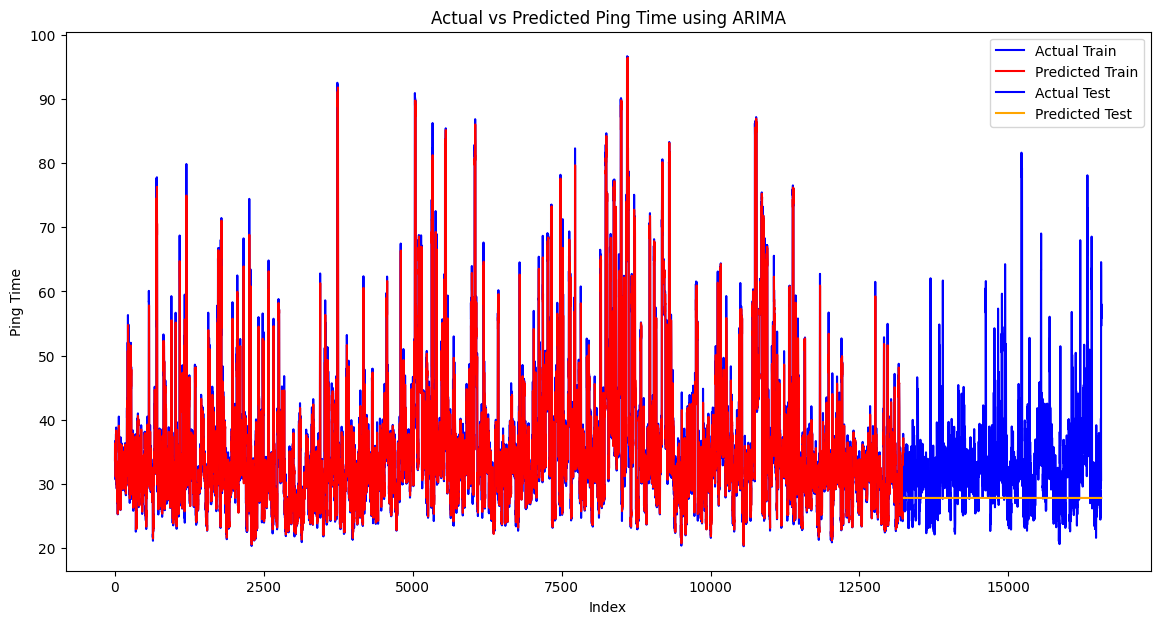

In [12]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

# Load the ping data
file_path = 'o1.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Prepare the data for ARIMA
arima_data = average_ping_per_second['Ping Time'].values
split_idx = int(len(arima_data) * 0.8)
train_arima, test_arima = arima_data[:split_idx], arima_data[split_idx:]

# Fit ARIMA model
arima_order = (5, 1, 0)  # Example order, should be optimized
arima_model = ARIMA(train_arima, order=arima_order)
arima_model_fit = arima_model.fit()

# Predict
y_train_pred_arima = arima_model_fit.predict(start=1, end=len(train_arima) - 1)
y_test_pred_arima = arima_model_fit.predict(start=len(train_arima), end=len(train_arima) + len(test_arima) - 1)

# Adjust lengths
y_train_pred_arima = np.concatenate(([np.nan], y_train_pred_arima))  # Align predictions with actual data

# Calculate metrics
train_mae_arima = mean_absolute_error(train_arima[1:], y_train_pred_arima[1:])  # Skip the first NaN value
train_r2_arima = r2_score(train_arima[1:], y_train_pred_arima[1:])
test_mae_arima = mean_absolute_error(test_arima, y_test_pred_arima)
test_r2_arima = r2_score(test_arima, y_test_pred_arima)

print(f'ARIMA Model:')
print(f'Training Mean Absolute Error: {train_mae_arima}')
print(f'Training R^2 Score: {train_r2_arima}')
print(f'Testing Mean Absolute Error: {test_mae_arima}')
print(f'Testing R^2 Score: {test_r2_arima}')
print('-'*30)

# Plot ARIMA model's performance
plt.figure(figsize=(14, 7))
plt.plot(range(len(train_arima)), train_arima, color='blue', label='Actual Train')
plt.plot(range(len(train_arima)), y_train_pred_arima, color='red', label='Predicted Train')
plt.plot(range(len(train_arima), len(train_arima) + len(test_arima)), test_arima, color='blue', label='Actual Test')
plt.plot(range(len(train_arima), len(train_arima) + len(test_arima)), y_test_pred_arima, color='orange', label='Predicted Test')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using ARIMA')
plt.show()


Online Training Epoch 1
414/414 - 12s - loss: 0.3514 - 12s/epoch - 28ms/step
Online Training Epoch 2


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 8s - loss: 0.0440 - 8s/epoch - 20ms/step
Online Training Epoch 3


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 8s - loss: 0.0177 - 8s/epoch - 19ms/step
Online Training Epoch 4


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 7s - loss: 0.0148 - 7s/epoch - 18ms/step
Online Training Epoch 5


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 7s - loss: 0.0142 - 7s/epoch - 18ms/step
Online Training Epoch 6


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 8s - loss: 0.0139 - 8s/epoch - 18ms/step
Online Training Epoch 7


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 7s - loss: 0.0138 - 7s/epoch - 18ms/step
Online Training Epoch 8


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 7s - loss: 0.0138 - 7s/epoch - 18ms/step
Online Training Epoch 9


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 8s - loss: 0.0137 - 8s/epoch - 19ms/step
Online Training Epoch 10


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 7s - loss: 0.0136 - 7s/epoch - 18ms/step
Online Training Epoch 11


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 8s - loss: 0.0136 - 8s/epoch - 19ms/step
Online Training Epoch 12


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 10s - loss: 0.0136 - 10s/epoch - 23ms/step
Online Training Epoch 13


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 9s - loss: 0.0135 - 9s/epoch - 21ms/step
Online Training Epoch 14


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 8s - loss: 0.0135 - 8s/epoch - 18ms/step
Online Training Epoch 15


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 8s - loss: 0.0135 - 8s/epoch - 18ms/step
Online Training Epoch 16


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 8s - loss: 0.0134 - 8s/epoch - 18ms/step
Online Training Epoch 17


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 8s - loss: 0.0134 - 8s/epoch - 18ms/step
Online Training Epoch 18


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 8s - loss: 0.0134 - 8s/epoch - 18ms/step
Online Training Epoch 19


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 8s - loss: 0.0134 - 8s/epoch - 18ms/step
Online Training Epoch 20


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 8s - loss: 0.0134 - 8s/epoch - 18ms/step
Online Training Epoch 21


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 8s - loss: 0.0133 - 8s/epoch - 18ms/step
Online Training Epoch 22


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 7s - loss: 0.0134 - 7s/epoch - 18ms/step
Online Training Epoch 23


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 8s - loss: 0.0134 - 8s/epoch - 20ms/step
Online Training Epoch 24


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 8s - loss: 0.0133 - 8s/epoch - 19ms/step
Online Training Epoch 25


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 8s - loss: 0.0133 - 8s/epoch - 20ms/step
Online Training Epoch 26


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 9s - loss: 0.0133 - 9s/epoch - 21ms/step
Online Training Epoch 27


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 8s - loss: 0.0133 - 8s/epoch - 19ms/step
Online Training Epoch 28


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 8s - loss: 0.0132 - 8s/epoch - 19ms/step
Online Training Epoch 29


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 9s - loss: 0.0133 - 9s/epoch - 22ms/step
Online Training Epoch 30


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 8s - loss: 0.0132 - 8s/epoch - 19ms/step
Online Training Epoch 31


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 8s - loss: 0.0133 - 8s/epoch - 18ms/step
Online Training Epoch 32


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 8s - loss: 0.0132 - 8s/epoch - 18ms/step
Online Training Epoch 33


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 8s - loss: 0.0132 - 8s/epoch - 18ms/step
Online Training Epoch 34


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 9s - loss: 0.0132 - 9s/epoch - 22ms/step
Online Training Epoch 35


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 9s - loss: 0.0132 - 9s/epoch - 23ms/step
Online Training Epoch 36


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 9s - loss: 0.0132 - 9s/epoch - 23ms/step
Online Training Epoch 37


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 9s - loss: 0.0131 - 9s/epoch - 22ms/step
Online Training Epoch 38


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 8s - loss: 0.0132 - 8s/epoch - 19ms/step
Online Training Epoch 39


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 8s - loss: 0.0131 - 8s/epoch - 18ms/step
Online Training Epoch 40


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 8s - loss: 0.0131 - 8s/epoch - 18ms/step
Online Training Epoch 41


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 7s - loss: 0.0131 - 7s/epoch - 18ms/step
Online Training Epoch 42


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 7s - loss: 0.0131 - 7s/epoch - 18ms/step
Online Training Epoch 43


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 8s - loss: 0.0131 - 8s/epoch - 18ms/step
Online Training Epoch 44


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 9s - loss: 0.0131 - 9s/epoch - 23ms/step
Online Training Epoch 45


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 9s - loss: 0.0131 - 9s/epoch - 22ms/step
Online Training Epoch 46


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 8s - loss: 0.0131 - 8s/epoch - 20ms/step
Online Training Epoch 47


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 8s - loss: 0.0130 - 8s/epoch - 20ms/step
Online Training Epoch 48


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 9s - loss: 0.0130 - 9s/epoch - 21ms/step
Online Training Epoch 49


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 9s - loss: 0.0131 - 9s/epoch - 22ms/step
Online Training Epoch 50


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


416/416 - 8s - loss: 0.0130 - 8s/epoch - 19ms/step


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


102/102 [==============================] - 1s 6ms/step
Online Learning LSTM Model:
Training Mean Absolute Error: 3.5950318611242866
Training R^2 Score: 0.7822385395477883
Testing Mean Absolute Error: 3.0937533690604573
Testing R^2 Score: 0.6615933718623428
------------------------------


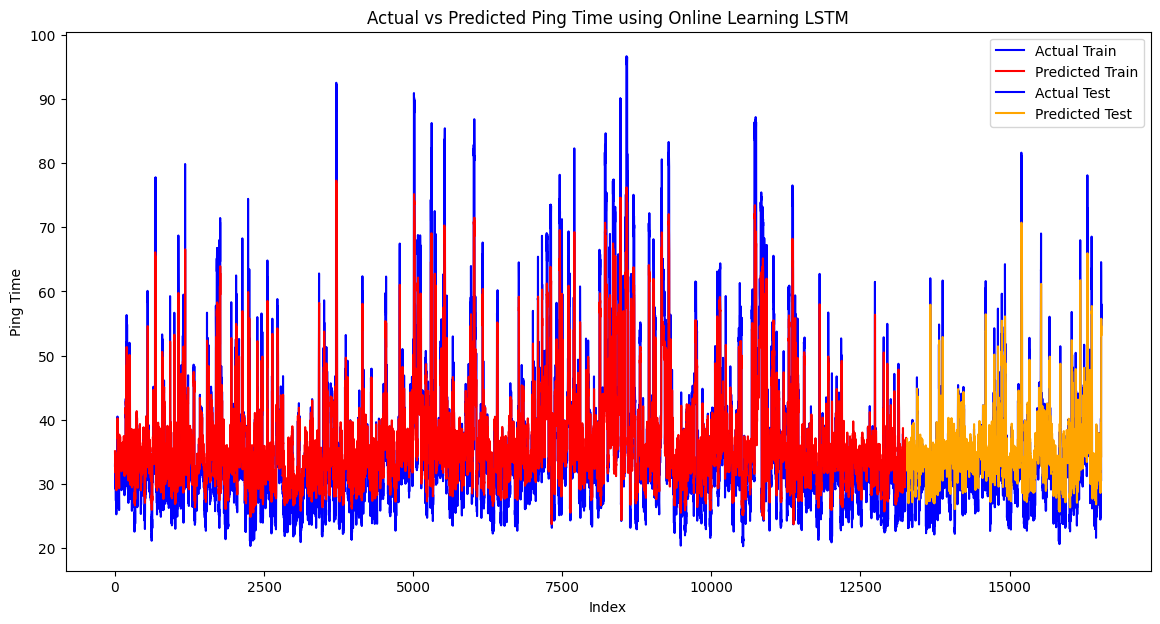

In [15]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop

# Load and preprocess the initial batch of data
file_path = 'o1.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Feature Engineering - Adding Lag Features
average_ping_per_second['Lag_1'] = average_ping_per_second['Ping Time'].shift(1)
average_ping_per_second['Lag_2'] = average_ping_per_second['Ping Time'].shift(2)
average_ping_per_second['Lag_3'] = average_ping_per_second['Ping Time'].shift(3)
average_ping_per_second.dropna(inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(average_ping_per_second[['Ping Time', 'Lag_1', 'Lag_2', 'Lag_3']])

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 20
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Define the model creation function
def create_model(units=100, optimizer='rmsprop', dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(SEQ_LENGTH, 4)))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(LSTM(units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Initialize the model
model = create_model(units=100, optimizer='rmsprop', dropout_rate=0.2)

# Online training loop
EPOCHS = 1
BATCH_SIZE = 32
for epoch in range(50):  # Simulate 50 epochs of online learning
    print(f'Online Training Epoch {epoch + 1}')
    
    # Train the model with the current batch of data
    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2, shuffle=False)
    
    # Simulate receiving a new data point
    # For demonstration, we'll use a portion of the test data as new data points
    if len(X_test) > 0:
        new_data_point = X_test[0:1]
        new_label = y_test[0:1]
        X_test = X_test[1:]
        y_test = y_test[1:]
        
        # Append the new data point to the training set
        X_train = np.append(X_train, new_data_point, axis=0)
        y_train = np.append(y_train, new_label, axis=0)
        
        # Normalize the new data point using the existing scaler
        new_data_point_scaled = scaler.transform(new_data_point.reshape(-1, 4))
        new_data_point_scaled = new_data_point_scaled.reshape(1, SEQ_LENGTH, 4)
        
        # Retrain the model with the new data point
        model.fit(new_data_point_scaled, new_label, epochs=EPOCHS, batch_size=1, verbose=0, shuffle=False)
        
# Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Online Learning LSTM Model:')
print(f'Training Mean Absolute Error: {train_mae}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Absolute Error: {test_mae}')
print(f'Testing R^2 Score: {test_r2}')
print('-' * 30)

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_train)), y_train, color='blue', label='Actual Train')
plt.plot(range(len(y_train)), y_train_pred, color='red', label='Predicted Train')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', label='Actual Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, color='orange', label='Predicted Test')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using Online Learning LSTM')
plt.show()


Online Training Epoch 1
414/414 - 20s - loss: 0.2944 - 20s/epoch - 47ms/step
Online Training Epoch 2


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 17s - loss: 0.0328 - 17s/epoch - 41ms/step
Online Training Epoch 3


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 17s - loss: 0.0160 - 17s/epoch - 41ms/step
Online Training Epoch 4


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 17s - loss: 0.0144 - 17s/epoch - 41ms/step
Online Training Epoch 5


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 17s - loss: 0.0140 - 17s/epoch - 40ms/step
Online Training Epoch 6


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 16s - loss: 0.0138 - 16s/epoch - 39ms/step
Online Training Epoch 7


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 15s - loss: 0.0135 - 15s/epoch - 36ms/step
Online Training Epoch 8


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 16s - loss: 0.0134 - 16s/epoch - 39ms/step
Online Training Epoch 9


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 13s - loss: 0.0133 - 13s/epoch - 31ms/step
Online Training Epoch 10


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 13s - loss: 0.0131 - 13s/epoch - 31ms/step
Online Training Epoch 11


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 13s - loss: 0.0131 - 13s/epoch - 31ms/step
Online Training Epoch 12


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 13s - loss: 0.0130 - 13s/epoch - 31ms/step
Online Training Epoch 13


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 15s - loss: 0.0130 - 15s/epoch - 37ms/step
Online Training Epoch 14


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 14s - loss: 0.0129 - 14s/epoch - 34ms/step
Online Training Epoch 15


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 14s - loss: 0.0129 - 14s/epoch - 34ms/step
Online Training Epoch 16


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 13s - loss: 0.0129 - 13s/epoch - 31ms/step
Online Training Epoch 17


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


414/414 - 13s - loss: 0.0128 - 13s/epoch - 31ms/step
Online Training Epoch 18


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 13s - loss: 0.0128 - 13s/epoch - 31ms/step
Online Training Epoch 19


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 13s - loss: 0.0128 - 13s/epoch - 31ms/step
Online Training Epoch 20


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 14s - loss: 0.0127 - 14s/epoch - 34ms/step
Online Training Epoch 21


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 16s - loss: 0.0127 - 16s/epoch - 39ms/step
Online Training Epoch 22


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 16s - loss: 0.0127 - 16s/epoch - 39ms/step
Online Training Epoch 23


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 16s - loss: 0.0127 - 16s/epoch - 39ms/step
Online Training Epoch 24


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 16s - loss: 0.0125 - 16s/epoch - 39ms/step
Online Training Epoch 25


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 16s - loss: 0.0126 - 16s/epoch - 38ms/step
Online Training Epoch 26


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 16s - loss: 0.0125 - 16s/epoch - 38ms/step
Online Training Epoch 27


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 16s - loss: 0.0125 - 16s/epoch - 38ms/step
Online Training Epoch 28


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 15s - loss: 0.0125 - 15s/epoch - 37ms/step
Online Training Epoch 29


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 16s - loss: 0.0125 - 16s/epoch - 38ms/step
Online Training Epoch 30


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 16s - loss: 0.0125 - 16s/epoch - 38ms/step
Online Training Epoch 31


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 16s - loss: 0.0125 - 16s/epoch - 38ms/step
Online Training Epoch 32


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 16s - loss: 0.0125 - 16s/epoch - 38ms/step
Online Training Epoch 33


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 16s - loss: 0.0124 - 16s/epoch - 38ms/step
Online Training Epoch 34


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 16s - loss: 0.0124 - 16s/epoch - 38ms/step
Online Training Epoch 35


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 16s - loss: 0.0124 - 16s/epoch - 38ms/step
Online Training Epoch 36


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 16s - loss: 0.0123 - 16s/epoch - 38ms/step
Online Training Epoch 37


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 16s - loss: 0.0123 - 16s/epoch - 38ms/step
Online Training Epoch 38


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 14s - loss: 0.0123 - 14s/epoch - 34ms/step
Online Training Epoch 39


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 14s - loss: 0.0123 - 14s/epoch - 34ms/step
Online Training Epoch 40


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 14s - loss: 0.0123 - 14s/epoch - 34ms/step
Online Training Epoch 41


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 13s - loss: 0.0123 - 13s/epoch - 32ms/step
Online Training Epoch 42


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 13s - loss: 0.0123 - 13s/epoch - 32ms/step
Online Training Epoch 43


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 13s - loss: 0.0122 - 13s/epoch - 32ms/step
Online Training Epoch 44


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 16s - loss: 0.0122 - 16s/epoch - 38ms/step
Online Training Epoch 45


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 15s - loss: 0.0122 - 15s/epoch - 37ms/step
Online Training Epoch 46


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 13s - loss: 0.0122 - 13s/epoch - 30ms/step
Online Training Epoch 47


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 12s - loss: 0.0122 - 12s/epoch - 30ms/step
Online Training Epoch 48


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 13s - loss: 0.0121 - 13s/epoch - 32ms/step
Online Training Epoch 49


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


415/415 - 16s - loss: 0.0121 - 16s/epoch - 38ms/step
Online Training Epoch 50


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


416/416 - 13s - loss: 0.0122 - 13s/epoch - 31ms/step


C:\Users\ALI\anaconda3\envs\keras_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


102/102 [==============================] - 1s 8ms/step
Online Learning LSTM Model with Handover Feature:
Training Mean Absolute Error: 4.648870598893339
Training R^2 Score: 0.6567923973393013
Testing Mean Absolute Error: 3.7151643023561642
Testing R^2 Score: 0.5064740570954172
------------------------------


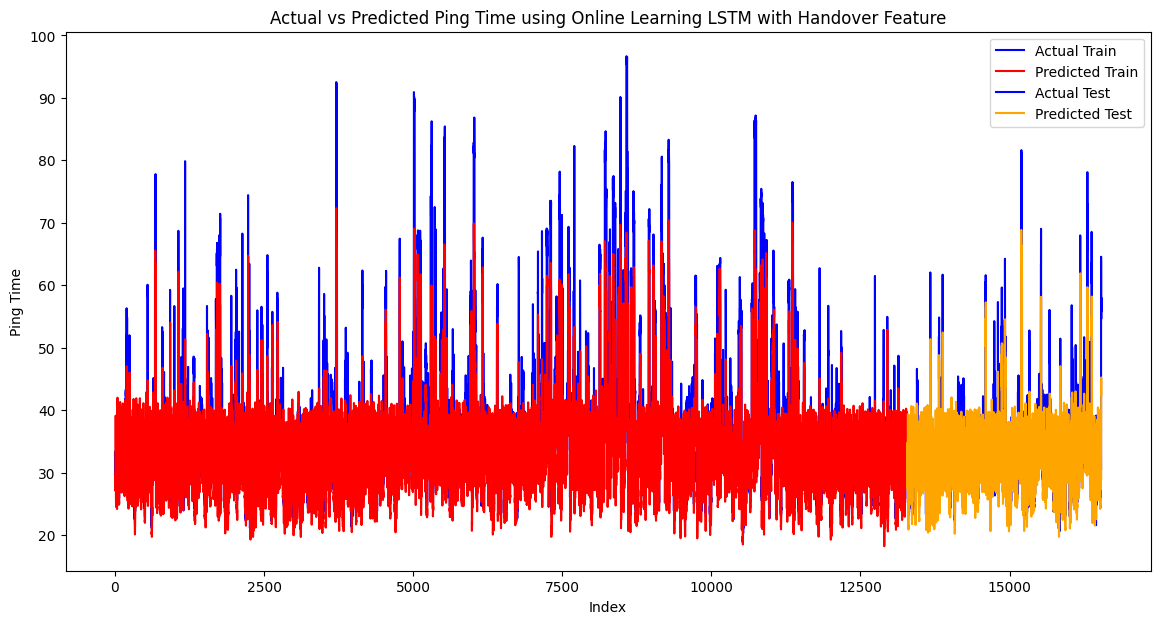

In [17]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop

# Load and preprocess the initial batch of data
file_path = 'o1.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)
df['Rounded Time'] = df['UTC Time'].dt.round('S')
df['Second'] = df['Rounded Time'].dt.second

# Adding the handover feature
handover_times = [12, 27, 42, 57]
df['Handover'] = df['Second'].apply(lambda x: 1 if x in handover_times else 0)

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')[['Ping Time', 'Handover']].mean().reset_index()

# Feature Engineering - Adding Lag Features
average_ping_per_second['Lag_1'] = average_ping_per_second['Ping Time'].shift(1)
average_ping_per_second['Lag_2'] = average_ping_per_second['Ping Time'].shift(2)
average_ping_per_second['Lag_3'] = average_ping_per_second['Ping Time'].shift(3)
average_ping_per_second.dropna(inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(average_ping_per_second[['Ping Time', 'Lag_1', 'Lag_2', 'Lag_3', 'Handover']])

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 20
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Define the model creation function
def create_model(units=100, optimizer='rmsprop', dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(SEQ_LENGTH, X.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(LSTM(units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Initialize the model
model = create_model(units=100, optimizer='rmsprop', dropout_rate=0.2)

# Online training loop
EPOCHS = 1
BATCH_SIZE = 32
for epoch in range(50):  # Simulate 50 epochs of online learning
    print(f'Online Training Epoch {epoch + 1}')
    
    # Train the model with the current batch of data
    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2, shuffle=False)
    
    # Simulate receiving a new data point
    # For demonstration, we'll use a portion of the test data as new data points
    if len(X_test) > 0:
        new_data_point = X_test[0:1]
        new_label = y_test[0:1]
        X_test = X_test[1:]
        y_test = y_test[1:]
        
        # Append the new data point to the training set
        X_train = np.append(X_train, new_data_point, axis=0)
        y_train = np.append(y_train, new_label, axis=0)
        
        # Normalize the new data point using the existing scaler
        new_data_point_scaled = scaler.transform(new_data_point.reshape(-1, 5))
        new_data_point_scaled = new_data_point_scaled.reshape(1, SEQ_LENGTH, 5)
        
        # Retrain the model with the new data point
        model.fit(new_data_point_scaled, new_label, epochs=EPOCHS, batch_size=1, verbose=0, shuffle=False)
        
# Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Online Learning LSTM Model with Handover Feature:')
print(f'Training Mean Absolute Error: {train_mae}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Absolute Error: {test_mae}')
print(f'Testing R^2 Score: {test_r2}')
print('-' * 30)

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_train)), y_train, color='blue', label='Actual Train')
plt.plot(range(len(y_train)), y_train_pred, color='red', label='Predicted Train')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', label='Actual Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, color='orange', label='Predicted Test')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using Online Learning LSTM with Handover Feature')
plt.show()



Best params for lags [1]: {'batch_size': 16, 'epochs': 50, 'model__dropout_rate': 0.3, 'model__optimizer': 'adam', 'model__units': 100}
Best score for lags [1]: -0.03488591156555728
Lags: [1]
Training Mean Absolute Error: 2.5268073057904954
Training R^2 Score: 0.8338370449456368
Testing Mean Absolute Error: 2.195033008992644
Testing R^2 Score: 0.7300225086361258
------------------------------
Best params for lags [3]: {'batch_size': 16, 'epochs': 50, 'model__dropout_rate': 0.3, 'model__optimizer': 'adam', 'model__units': 50}
Best score for lags [3]: -0.03511565684421219
Lags: [3]
Training Mean Absolute Error: 2.7044673505366217
Training R^2 Score: 0.7889753055242987
Testing Mean Absolute Error: 2.199645396264682
Testing R^2 Score: 0.7232933670873962
------------------------------
Best params for lags [5]: {'batch_size': 64, 'epochs': 50, 'model__dropout_rate': 0.1, 'model__optimizer': 'adam', 'model__units': 50}
Best score for lags [5]: -0.036072059684371334
Lags: [5]
Training Mean Abs

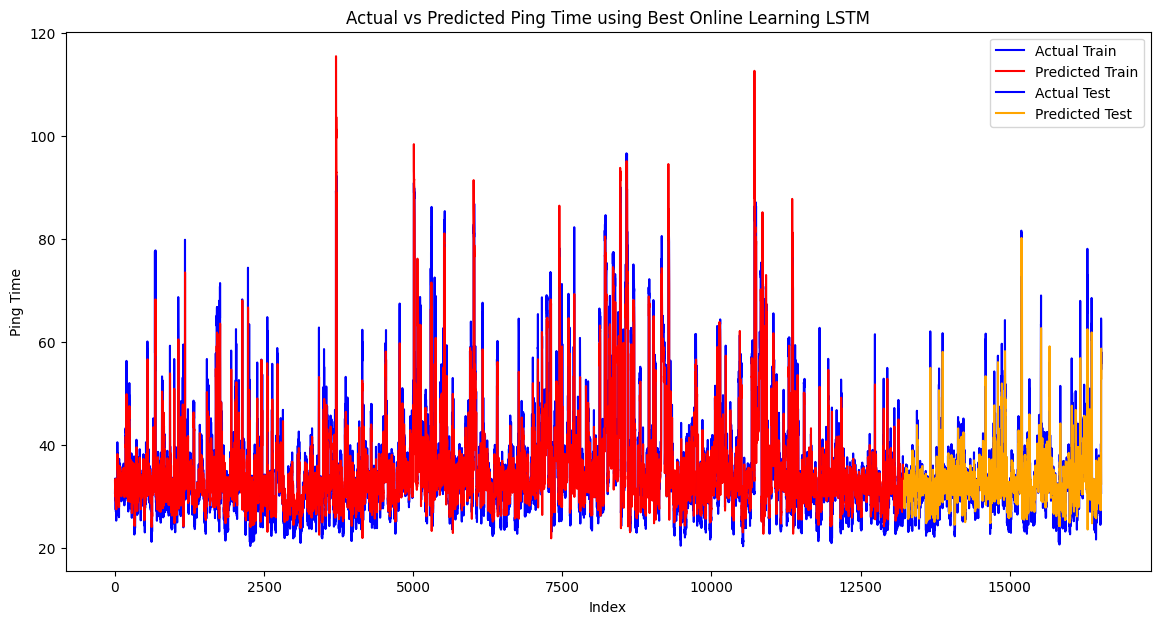

In [20]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from scikeras.wrappers import KerasRegressor

# Load and preprocess the initial batch of data
file_path = 'o1.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Feature Engineering - Adding Lag Features
def add_lag_features(df, lags):
    for lag in lags:
        df[f'Lag_{lag}'] = df['Ping Time'].shift(lag)
    df.dropna(inplace=True)
    return df

# Normalize the data
scaler = MinMaxScaler()

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 20

# Define the model creation function
def create_model(units=100, dropout_rate=0.2, optimizer='rmsprop'):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(LSTM(units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Define hyperparameter grid
param_grid = {
    'model__units': [50, 100, 150],
    'model__dropout_rate': [0.1, 0.2, 0.3],
    'model__optimizer': ['rmsprop', 'adam'],
    'batch_size': [16, 32, 64],
    'epochs': [20, 50]
}

# GridSearchCV for hyperparameter tuning
best_models = {}
results = []
for lags in [[1], [3], [5]]:
    df_lagged = add_lag_features(average_ping_per_second.copy(), lags)
    scaled_data = scaler.fit_transform(df_lagged[['Ping Time'] + [f'Lag_{lag}' for lag in lags]])
    X, y = create_sequences(scaled_data, SEQ_LENGTH)
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    model = KerasRegressor(model=create_model, verbose=0)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=3), n_jobs=-1, scoring='neg_mean_absolute_error')
    grid_result = grid.fit(X_train, y_train)
    
    best_models[tuple(lags)] = grid_result.best_estimator_
    print(f'Best params for lags {lags}: {grid_result.best_params_}')
    print(f'Best score for lags {lags}: {grid_result.best_score_}')
    
    # Evaluate the model
    y_train_pred = best_models[tuple(lags)].predict(X_train)
    y_test_pred = best_models[tuple(lags)].predict(X_test)

    # Inverse transform the predictions and actual values
    y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
    y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

    y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
    y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

    # Calculate metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f'Lags: {lags}')
    print(f'Training Mean Absolute Error: {train_mae}')
    print(f'Training R^2 Score: {train_r2}')
    print(f'Testing Mean Absolute Error: {test_mae}')
    print(f'Testing R^2 Score: {test_r2}')
    print('-' * 30)
    
    # Store the results
    results.append({
        'lags': lags,
        'train_mae': train_mae,
        'train_r2': train_r2,
        'test_mae': test_mae,
        'test_r2': test_r2
    })

# Select the best model
best_lag, best_model = max(best_models.items(), key=lambda item: item[1].score(X_test, y_test))

# Retrain the best model on the full training set
best_lagged_df = add_lag_features(average_ping_per_second.copy(), list(best_lag))
scaled_data = scaler.fit_transform(best_lagged_df[['Ping Time'] + [f'Lag_{lag}' for lag in best_lag]])
X, y = create_sequences(scaled_data, SEQ_LENGTH)
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

best_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Evaluate the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Best Online Learning LSTM Model:')
print(f'Lags: {best_lag}')
print(f'Training Mean Absolute Error: {train_mae}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Absolute Error: {test_mae}')
print(f'Testing R^2 Score: {test_r2}')
print('-' * 30)

# Plot the predictions for the best model
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_train)), y_train, color='blue', label='Actual Train')
plt.plot(range(len(y_train)), y_train_pred, color='red', label='Predicted Train')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', label='Actual Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, color='orange', label='Predicted Test')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using Best Online Learning LSTM')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from scikeras.wrappers import KerasRegressor

# Load and preprocess the initial batch of data
file_path = 'o1.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Feature Engineering - Adding Lag Features
def add_lag_features(df, lags):
    for lag in lags:
        df[f'Lag_{lag}'] = df['Ping Time'].shift(lag)
    df.dropna(inplace=True)
    return df

# Normalize the data
scaler = MinMaxScaler()

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 20

# Define the model creation function
def create_model(units=100, dropout_rate=0.2, optimizer='rmsprop'):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(LSTM(units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Define hyperparameter grid
param_grid = {
    'model__units': [50, 100, 150],
    'model__dropout_rate': [0.1, 0.2, 0.3],
    'model__optimizer': ['rmsprop', 'adam'],
    'batch_size': [16, 32, 64],
    'epochs': [20, 50]
}

# GridSearchCV for hyperparameter tuning
best_models = {}
results = []
for lags in [[1], [3], [5]]:
    df_lagged = add_lag_features(average_ping_per_second.copy(), lags)
    scaled_data = scaler.fit_transform(df_lagged[['Ping Time'] + [f'Lag_{lag}' for lag in lags]])
    X, y = create_sequences(scaled_data, SEQ_LENGTH)
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    model = KerasRegressor(model=create_model, verbose=0)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=3), n_jobs=-1, scoring='neg_mean_absolute_error')
    grid_result = grid.fit(X_train, y_train)
    
    best_models[tuple(lags)] = grid_result.best_estimator_
    print(f'Best params for lags {lags}: {grid_result.best_params_}')
    print(f'Best score for lags {lags}: {grid_result.best_score_}')
    
    # Evaluate the model
    y_train_pred = best_models[tuple(lags)].predict(X_train)
    y_test_pred = best_models[tuple(lags)].predict(X_test)

    # Inverse transform the predictions and actual values
    y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
    y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

    y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
    y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

    # Calculate metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f'Lags: {lags}')
    print(f'Training Mean Absolute Error: {train_mae}')
    print(f'Training R^2 Score: {train_r2}')
    print(f'Testing Mean Absolute Error: {test_mae}')
    print(f'Testing R^2 Score: {test_r2}')
    print('-' * 30)
    
    # Store the results
    results.append({
        'lags': lags,
        'train_mae': train_mae,
        'train_r2': train_r2,
        'test_mae': test_mae,
        'test_r2': test_r2
    })
    
    # Plot the predictions for the current model
    plt.figure(figsize=(14, 7))
    plt.plot(range(len(y_train)), y_train, color='blue', label='Actual Train')
    plt.plot(range(len(y_train)), y_train_pred, color='red', label='Predicted Train')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', label='Actual Test')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, color='orange', label='Predicted Test')
    plt.legend()
    plt.xlabel('Index')
    plt.ylabel('Ping Time')
    plt.title(f'Actual vs Predicted Ping Time using Lags {lags}')
    plt.show()

# Select the best model
best_lag, best_model = max(best_models.items(), key=lambda item: item[1].score(X_test, y_test))

# Retrain the best model on the full training set
best_lagged_df = add_lag_features(average_ping_per_second.copy(), list(best_lag))
scaled_data = scaler.fit_transform(best_lagged_df[['Ping Time'] + [f'Lag_{lag}' for lag in best_lag]])
X, y = create_sequences(scaled_data, SEQ_LENGTH)
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

best_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Evaluate the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Best Online Learning LSTM Model:')
print(f'Lags: {best_lag}')
print(f'Training Mean Absolute Error: {train_mae}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Absolute Error: {test_mae}')
print(f'Testing R^2 Score: {test_r2}')
print('-' * 30)

# Plot the predictions for the best model
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_train)), y_train, color='blue', label='Actual Train')
plt.plot(range(len(y_train)), y_train_pred, color='red', label='Predicted Train')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', label='Actual Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, color='orange', label='Predicted Test')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Ping Time')
plt.title('Actual vs Predicted Ping Time using Best Online Learning LSTM')
plt.show()


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
import tensorflow as tf

# Load and preprocess the initial batch of data
file_path = 'o1.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Feature Engineering - Adding Lag Features
def add_lag_features(df, lags):
    for lag in lags:
        df[f'Lag_{lag}'] = df['Ping Time'].shift(lag)
    df.dropna(inplace=True)
    return df

# Normalize the data
scaler = MinMaxScaler()

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 20

# Define the model creation function with parameters
def create_best_model(input_shape, units, dropout_rate, optimizer):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(LSTM(units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Custom training loop to print average loss at the end of each epoch
def custom_training_loop(model, X_train, y_train, batch_size, epochs):
    num_batches = int(np.ceil(len(X_train) / batch_size))
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(num_batches):
            start = i * batch_size
            end = start + batch_size
            X_batch = X_train[start:end]
            y_batch = y_train[start:end]
            batch_loss = model.train_on_batch(X_batch, y_batch)
            epoch_loss += batch_loss
        epoch_loss /= num_batches
        print(f'Epoch {epoch + 1}: loss = {epoch_loss:.4f}')

# Function to evaluate and plot the model
def evaluate_and_plot_online(lags, best_params):
    df_lagged = add_lag_features(average_ping_per_second.copy(), lags)
    scaled_data = scaler.fit_transform(df_lagged[['Ping Time'] + [f'Lag_{lag}' for lag in lags]])
    X, y = create_sequences(scaled_data, SEQ_LENGTH)
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    model = create_best_model((SEQ_LENGTH, X_train.shape[2]), best_params['model__units'], best_params['model__dropout_rate'], best_params['model__optimizer'])

    custom_training_loop(model, X_train, y_train, best_params['batch_size'], best_params['epochs'])

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
    y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

    y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
    y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f'Lags: {lags}')
    print(f'Training Mean Absolute Error: {train_mae}')
    print(f'Training R^2 Score: {train_r2}')
    print(f'Testing Mean Absolute Error: {test_mae}')
    print(f'Testing R^2 Score: {test_r2}')
    print('-' * 30)
    
    plt.figure(figsize=(14, 7))
    plt.plot(range(len(y_train)), y_train, color='blue', label='Actual Train')
    plt.plot(range(len(y_train)), y_train_pred, color='red', label='Predicted Train')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', label='Actual Test')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, color='orange', label='Predicted Test')
    plt.legend()
    plt.xlabel('Index')
    plt.ylabel('Ping Time')
    plt.title(f'Actual vs Predicted Ping Time using Lags {lags}')
    plt.show()

# Best parameters for each lag configuration
best_params_lags_1 = {'batch_size': 16, 'epochs': 50, 'model__dropout_rate': 0.3, 'model__optimizer': Adam(), 'model__units': 100}
best_params_lags_3 = {'batch_size': 16, 'epochs': 50, 'model__dropout_rate': 0.3, 'model__optimizer': Adam(), 'model__units': 50}
best_params_lags_5 = {'batch_size': 64, 'epochs': 50, 'model__dropout_rate': 0.1, 'model__optimizer': Adam(), 'model__units': 50}

# Evaluate and plot for each lag configuration with online learning
evaluate_and_plot_online([1], best_params_lags_1)
evaluate_and_plot_online([3], best_params_lags_3)
evaluate_and_plot_online([5], best_params_lags_5)


Epoch 1: loss = 0.2327
Epoch 2: loss = 0.0230
Epoch 3: loss = 0.0193
Epoch 4: loss = 0.0191
Epoch 5: loss = 0.0190
Epoch 6: loss = 0.0191
Epoch 7: loss = 0.0190
Epoch 8: loss = 0.0188
Epoch 9: loss = 0.0186
Epoch 10: loss = 0.0184
Epoch 11: loss = 0.0183
Epoch 12: loss = 0.0181


KeyboardInterrupt: 

Epoch 1/50
828/828 - 28s - loss: 0.2343 - 0ms/step
Epoch 2/50
828/828 - 21s - loss: 0.0244 - 0ms/step
Epoch 3/50
828/828 - 21s - loss: 0.0193 - 0ms/step
Epoch 4/50
828/828 - 20s - loss: 0.0189 - 0ms/step
Epoch 5/50
828/828 - 21s - loss: 0.0190 - 0ms/step
Epoch 6/50
828/828 - 20s - loss: 0.0188 - 0ms/step
Epoch 7/50
828/828 - 21s - loss: 0.0190 - 0ms/step
Epoch 8/50
828/828 - 20s - loss: 0.0187 - 0ms/step
Epoch 9/50
828/828 - 20s - loss: 0.0186 - 0ms/step
Epoch 10/50
828/828 - 20s - loss: 0.0184 - 0ms/step
Epoch 11/50
828/828 - 20s - loss: 0.0182 - 0ms/step
Epoch 12/50
828/828 - 21s - loss: 0.0181 - 0ms/step
Epoch 13/50
828/828 - 20s - loss: 0.0180 - 0ms/step
Epoch 14/50
828/828 - 20s - loss: 0.0179 - 0ms/step
Epoch 15/50
828/828 - 21s - loss: 0.0179 - 0ms/step
Epoch 16/50
828/828 - 21s - loss: 0.0179 - 0ms/step
Epoch 17/50
828/828 - 20s - loss: 0.0179 - 0ms/step
Epoch 18/50
828/828 - 20s - loss: 0.0178 - 0ms/step
Epoch 19/50
828/828 - 20s - loss: 0.0178 - 0ms/step
Epoch 20/50
828/828 -

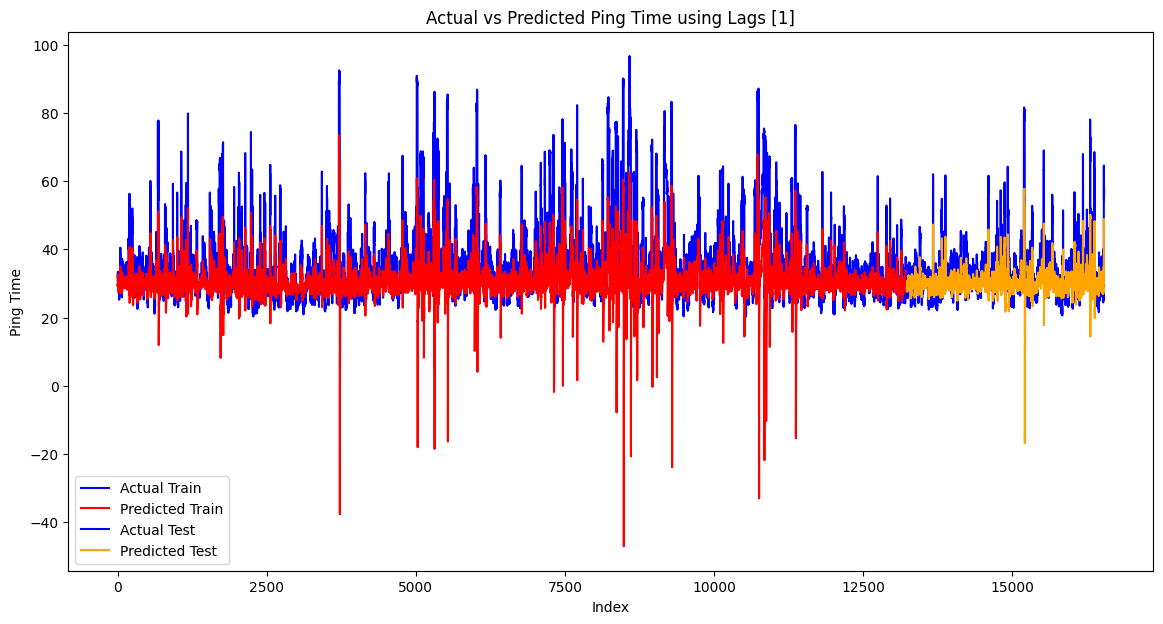

Epoch 1/50
827/827 - 17s - loss: 0.3413 - 0ms/step
Epoch 2/50
827/827 - 15s - loss: 0.0312 - 0ms/step
Epoch 3/50
827/827 - 15s - loss: 0.0197 - 0ms/step
Epoch 4/50
827/827 - 15s - loss: 0.0194 - 0ms/step
Epoch 5/50
827/827 - 15s - loss: 0.0194 - 0ms/step
Epoch 6/50
827/827 - 15s - loss: 0.0193 - 0ms/step
Epoch 7/50
827/827 - 15s - loss: 0.0194 - 0ms/step
Epoch 8/50
827/827 - 15s - loss: 0.0192 - 0ms/step
Epoch 9/50
827/827 - 15s - loss: 0.0190 - 0ms/step
Epoch 10/50
827/827 - 15s - loss: 0.0190 - 0ms/step
Epoch 11/50
827/827 - 15s - loss: 0.0188 - 0ms/step
Epoch 12/50
827/827 - 14s - loss: 0.0186 - 0ms/step
Epoch 13/50
827/827 - 15s - loss: 0.0185 - 0ms/step
Epoch 14/50
827/827 - 15s - loss: 0.0183 - 0ms/step
Epoch 15/50
827/827 - 15s - loss: 0.0182 - 0ms/step
Epoch 16/50
827/827 - 15s - loss: 0.0181 - 0ms/step
Epoch 17/50
827/827 - 15s - loss: 0.0179 - 0ms/step
Epoch 18/50
827/827 - 15s - loss: 0.0178 - 0ms/step
Epoch 19/50
827/827 - 14s - loss: 0.0176 - 0ms/step
Epoch 20/50
827/827 -

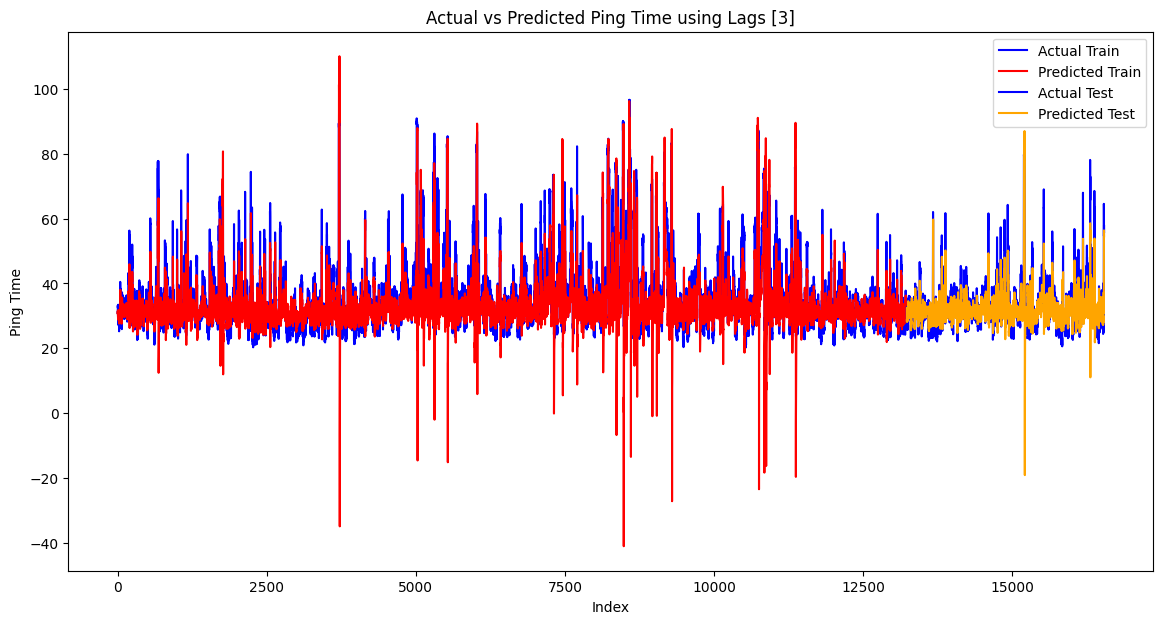

Epoch 1/50
207/207 - 10s - loss: 0.2439 - 0ms/step
Epoch 2/50
207/207 - 5s - loss: 0.1089 - 0ms/step
Epoch 3/50
207/207 - 5s - loss: 0.0687 - 0ms/step
Epoch 4/50
207/207 - 5s - loss: 0.0441 - 0ms/step
Epoch 5/50
207/207 - 5s - loss: 0.0308 - 0ms/step
Epoch 6/50
207/207 - 5s - loss: 0.0227 - 0ms/step
Epoch 7/50
207/207 - 5s - loss: 0.0185 - 0ms/step
Epoch 8/50
207/207 - 5s - loss: 0.0160 - 0ms/step
Epoch 9/50
207/207 - 5s - loss: 0.0147 - 0ms/step
Epoch 10/50
207/207 - 5s - loss: 0.0140 - 0ms/step
Epoch 11/50
207/207 - 5s - loss: 0.0137 - 0ms/step
Epoch 12/50
207/207 - 5s - loss: 0.0136 - 0ms/step
Epoch 13/50
207/207 - 5s - loss: 0.0133 - 0ms/step
Epoch 14/50
207/207 - 5s - loss: 0.0131 - 0ms/step
Epoch 15/50
207/207 - 5s - loss: 0.0131 - 0ms/step
Epoch 16/50
207/207 - 5s - loss: 0.0130 - 0ms/step
Epoch 17/50
207/207 - 5s - loss: 0.0129 - 0ms/step
Epoch 18/50
207/207 - 5s - loss: 0.0129 - 0ms/step
Epoch 19/50
207/207 - 5s - loss: 0.0127 - 0ms/step
Epoch 20/50
207/207 - 5s - loss: 0.0127

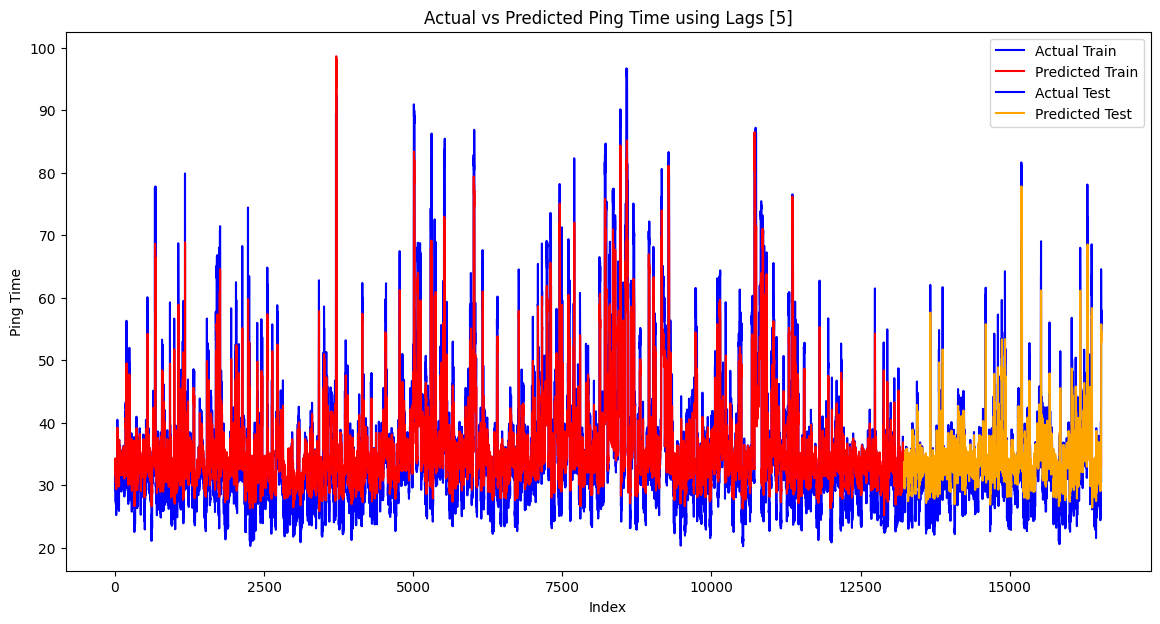

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import LambdaCallback
import time

# Load and preprocess the initial batch of data
file_path = 'o1.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Feature Engineering - Adding Lag Features
def add_lag_features(df, lags):
    for lag in lags:
        df[f'Lag_{lag}'] = df['Ping Time'].shift(lag)
    df.dropna(inplace=True)
    return df

# Normalize the data
scaler = MinMaxScaler()

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 20

# Define the model creation function with parameters
def create_best_model(input_shape, units, dropout_rate, optimizer):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(LSTM(units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Function to evaluate and plot the model
def evaluate_and_plot_online(lags, best_params):
    df_lagged = add_lag_features(average_ping_per_second.copy(), lags)
    scaled_data = scaler.fit_transform(df_lagged[['Ping Time'] + [f'Lag_{lag}' for lag in lags]])
    X, y = create_sequences(scaled_data, SEQ_LENGTH)
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    model = create_best_model((SEQ_LENGTH, X_train.shape[2]), best_params['model__units'], best_params['model__dropout_rate'], best_params['model__optimizer'])

    # Online learning - train in small batches
    num_batches = int(np.ceil(len(X_train) / best_params['batch_size']))
    for epoch in range(best_params['epochs']):
        start_time = time.time()
        epoch_loss = 0
        for i in range(num_batches):
            start = i * best_params['batch_size']
            end = start + best_params['batch_size']
            X_batch = X_train[start:end]
            y_batch = y_train[start:end]
            batch_loss = model.train_on_batch(X_batch, y_batch)
            epoch_loss += batch_loss
        epoch_loss /= num_batches
        end_time = time.time()
        epoch_time = end_time - start_time
        print(f'Epoch {epoch + 1}/{best_params["epochs"]}')
        print(f'{num_batches}/{num_batches} - {epoch_time:.0f}s - loss: {epoch_loss:.4f} - {epoch_time/num_batches:.0f}ms/step')

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
    y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

    y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), X_train[:, -1, 1:]), axis=1))[:, 0]
    y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f'Lags: {lags}')
    print(f'Training Mean Absolute Error: {train_mae}')
    print(f'Training R^2 Score: {train_r2}')
    print(f'Testing Mean Absolute Error: {test_mae}')
    print(f'Testing R^2 Score: {test_r2}')
    print('-' * 30)
    
    plt.figure(figsize=(14, 7))
    plt.plot(range(len(y_train)), y_train, color='blue', label='Actual Train')
    plt.plot(range(len(y_train)), y_train_pred, color='red', label='Predicted Train')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', label='Actual Test')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, color='orange', label='Predicted Test')
    plt.legend()
    plt.xlabel('Index')
    plt.ylabel('Ping Time')
    plt.title(f'Actual vs Predicted Ping Time using Lags {lags}')
    plt.show()

# Best parameters for each lag configuration
best_params_lags_1 = {'batch_size': 16, 'epochs': 50, 'model__dropout_rate': 0.3, 'model__optimizer': Adam(), 'model__units': 100}
best_params_lags_3 = {'batch_size': 16, 'epochs': 50, 'model__dropout_rate': 0.3, 'model__optimizer': Adam(), 'model__units': 50}
best_params_lags_5 = {'batch_size': 64, 'epochs': 50, 'model__dropout_rate': 0.1, 'model__optimizer': Adam(), 'model__units': 50}

# Evaluate and plot for each lag configuration with online learning
evaluate_and_plot_online([1], best_params_lags_1)
evaluate_and_plot_online([3], best_params_lags_3)
evaluate_and_plot_online([5], best_params_lags_5)


Best: 0.809000 using {'batch_size': 16, 'epochs': 20, 'model__dropout_rate': 0.2, 'model__optimizer': 'adam', 'model__units': 50}
Epoch 1/20
828/828 - 16s - loss: 0.1548 - 0ms/step
Epoch 2/20
828/828 - 11s - loss: 0.0165 - 0ms/step
Epoch 3/20
828/828 - 11s - loss: 0.0083 - 0ms/step
Epoch 4/20
828/828 - 11s - loss: 0.0066 - 0ms/step
Epoch 5/20
828/828 - 11s - loss: 0.0059 - 0ms/step
Epoch 6/20
828/828 - 11s - loss: 0.0055 - 0ms/step
Epoch 7/20
828/828 - 11s - loss: 0.0053 - 0ms/step
Epoch 8/20
828/828 - 12s - loss: 0.0052 - 0ms/step
Epoch 9/20
828/828 - 11s - loss: 0.0052 - 0ms/step
Epoch 10/20
828/828 - 11s - loss: 0.0051 - 0ms/step
Epoch 11/20
828/828 - 11s - loss: 0.0050 - 0ms/step
Epoch 12/20
828/828 - 11s - loss: 0.0050 - 0ms/step
Epoch 13/20
828/828 - 11s - loss: 0.0049 - 0ms/step
Epoch 14/20
828/828 - 11s - loss: 0.0049 - 0ms/step
Epoch 15/20
828/828 - 11s - loss: 0.0049 - 0ms/step
Epoch 16/20
828/828 - 12s - loss: 0.0048 - 0ms/step
Epoch 17/20
828/828 - 11s - loss: 0.0048 - 0ms/

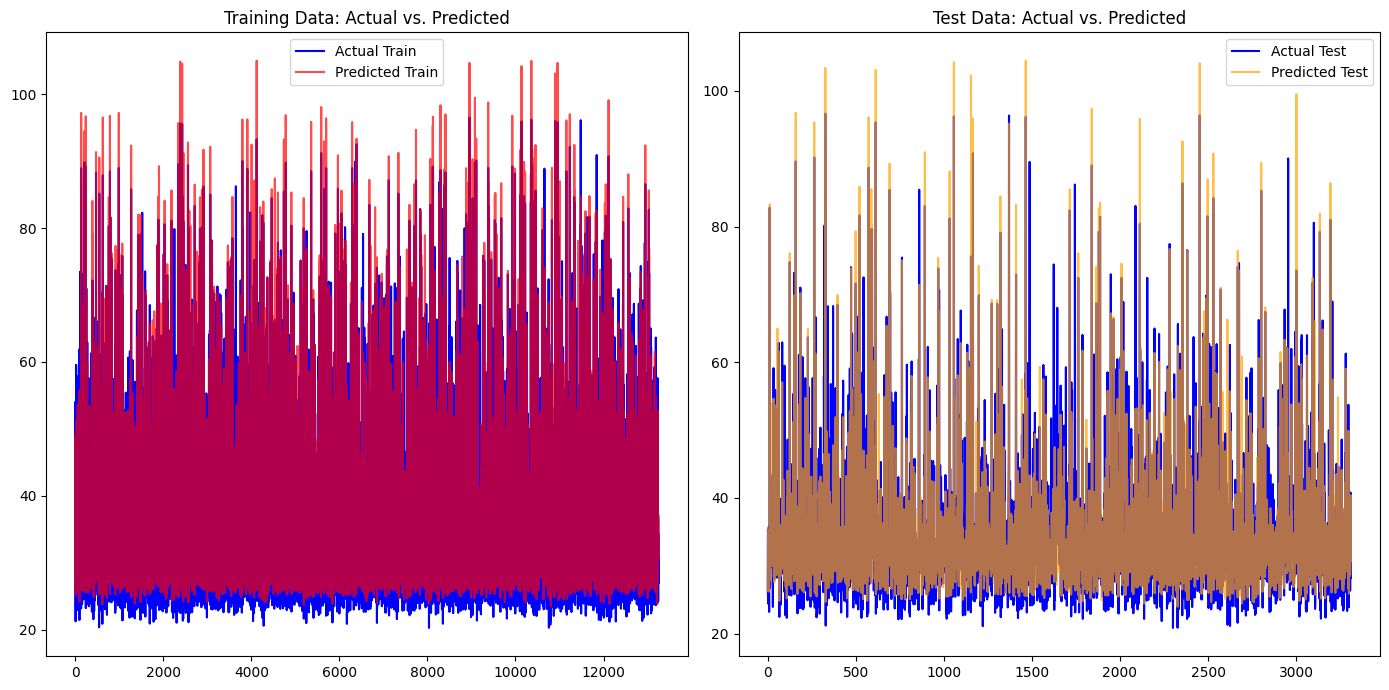

In [6]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
import time

# Load and preprocess data
def load_and_preprocess_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = []
    for line in lines:
        match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
        if match:
            timestamp = float(match.group(1))
            ping_time = float(match.group(2))
            data.append([timestamp, ping_time])

    df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])
    df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)
    df['Rounded Time'] = df['UTC Time'].dt.round('S')
    return df.groupby('Rounded Time')['Ping Time'].mean().reset_index(name='Ping Time')

def add_lag_features(df, num_lags):
    for lag in range(1, num_lags + 1):
        df[f'Lag_{lag}'] = df['Ping Time'].shift(lag)
    df.dropna(inplace=True)
    return df[['Ping Time'] + [f'Lag_{lag}' for lag in range(1, num_lags + 1)]]

# Create LSTM model
def create_model(units=50, dropout_rate=0.2, optimizer='adam'):
    model = Sequential([
        LSTM(units, return_sequences=True, input_shape=(5, 1)),  # Adjusted to 5 time steps
        Dropout(dropout_rate),
        BatchNormalization(),
        LSTM(units, return_sequences=False),
        Dropout(dropout_rate),
        BatchNormalization(),
        Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Load data and prepare for training
df = load_and_preprocess_data('o1.txt')
df_features = add_lag_features(df, 5)  # Using 5 lags

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_features)
X, y = df_scaled[:, 1:], df_scaled[:, 0]  # Features and target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Wrap Keras model for use in scikit-learn
model = KerasRegressor(model=create_model, verbose=0)

# Set up hyperparameter grid
param_grid = {
    'model__units': [50, 100],
    'model__dropout_rate': [0.1, 0.2, 0.3],
    'model__optimizer': ['adam', 'rmsprop'],
    'batch_size': [16, 32],
    'epochs': [10, 20]
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Display best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Best parameters
best_params = grid_result.best_params_

# Create the best model
best_model = create_model(units=best_params['model__units'], dropout_rate=best_params['model__dropout_rate'], optimizer=best_params['model__optimizer'])

# Online learning - train in small batches
num_batches = int(np.ceil(len(X_train) / best_params['batch_size']))
for epoch in range(best_params['epochs']):
    start_time = time.time()
    epoch_loss = 0
    for i in range(num_batches):
        start = i * best_params['batch_size']
        end = start + best_params['batch_size']
        X_batch = X_train[start:end]
        y_batch = y_train[start:end]
        batch_loss = best_model.train_on_batch(X_batch, y_batch)
        epoch_loss += batch_loss
    epoch_loss /= num_batches
    end_time = time.time()
    epoch_time = end_time - start_time
    print(f'Epoch {epoch + 1}/{best_params["epochs"]}')
    print(f'{num_batches}/{num_batches} - {epoch_time:.0f}s - loss: {epoch_loss:.4f} - {epoch_time/num_batches:.0f}ms/step')

# Predict and evaluate
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Inverse transform predictions if necessary
y_train = scaler.inverse_transform(np.concatenate([y_train.reshape(-1, 1), X_train], axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), X_test], axis=1))[:, 0]
y_pred_train = scaler.inverse_transform(np.concatenate([y_pred_train.reshape(-1, 1), X_train], axis=1))[:, 0]
y_pred_test = scaler.inverse_transform(np.concatenate([y_pred_test.reshape(-1, 1), X_test], axis=1))[:, 0]

# Plot results
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(y_train, label='Actual Train', color='blue')
plt.plot(y_pred_train, label='Predicted Train', color='red', alpha=0.7)
plt.title('Training Data: Actual vs. Predicted')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_test, label='Actual Test', color='blue')
plt.plot(y_pred_test, label='Predicted Test', color='orange', alpha=0.7)
plt.title('Test Data: Actual vs. Predicted')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
print(f'Training Mean Absolute Error: {train_mae}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing Mean Absolute Error: {test_mae}')
print(f'Testing R^2 Score: {test_r2}')
print('-' * 30)

NameError: name 'train_mae' is not defined